In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy.ma as ma
import numpy.linalg as linalg
from scipy.stats.stats import pearsonr

# Estadística
from scipy import stats 
from scipy import special

# Cartografía 
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.util import add_cyclic_point
import cartopy.io.shapereader as shpreader

# Lectura de datos
from netCDF4 import Dataset
import xarray as xr

# Índices Climáticos
from xclim.core.calendar import percentile_doy
from xclim.indices import tn10p, tx10p

from scipy.fft import fft 
from statsmodels.tsa import stattools 
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

In [119]:
path='/Users/barbo/Desktop/analisis multivariante/indices/'
file1='Tn10p_ESP_nan.nc'
tn10 = xr.open_dataset(path+file1)

In [120]:
tn10=tn10.__xarray_dataarray_variable__


In [121]:
#remallado de la matriz para coger la mitad de los puntos¡:
tn10_remallado=tn10.interp(lat=tn10.lat[::2]).interp(lon=tn10.lon[::2])
tn10_remallado=tn10_remallado.set_index(lon='x')
tn10_remallado=tn10_remallado.set_index(lat='y')

In [122]:
tn10_remallado

<xarray.DataArray '__xarray_dataarray_variable__' (time: 1368, lat: 95, lon: 115)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2014-12-01
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [123]:
lon=tn10_remallado.lon
lat=tn10_remallado.lat

time=tn10_remallado.time

In [124]:
lat

<xarray.DataArray 'lat' (lat: 95)>
array([44.169965, 44.079965, 43.989965, 43.899965, 43.809965, 43.719965,
       43.629965, 43.539965, 43.449965, 43.359965, 43.269965, 43.179965,
       43.089965, 42.999965, 42.909965, 42.819965, 42.729965, 42.639965,
       42.549965, 42.459965, 42.369965, 42.279965, 42.189965, 42.099965,
       42.009965, 41.919965, 41.829965, 41.739965, 41.649965, 41.559965,
       41.469965, 41.379965, 41.289965, 41.199965, 41.109965, 41.019965,
       40.929965, 40.839965, 40.749965, 40.659965, 40.569965, 40.479965,
       40.389965, 40.299965, 40.209965, 40.119965, 40.029965, 39.939965,
       39.849965, 39.759965, 39.669965, 39.579965, 39.489965, 39.399965,
       39.309965, 39.219965, 39.129965, 39.039965, 38.949965, 38.859965,
       38.769965, 38.679965, 38.589965, 38.499965, 38.409965, 38.319965,
       38.229965, 38.139965, 38.049965, 37.959965, 37.869965, 37.779965,
       37.689965, 37.599965, 37.509965, 37.419965, 37.329965, 37.239965,
       37.149965, 37.059965, 36.969965, 36.879965, 36.789965, 36.699965,
       36.609965, 36.519965, 36.429965, 36.339965, 36.249965, 36.159965,
       36.069965, 35.979965, 35.889965, 35.799965, 35.709965])
Coordinates:
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71

In [125]:
lon

<xarray.DataArray 'lon' (lon: 115)>
array([-9.672583, -9.555583, -9.438583, -9.321583, -9.204583, -9.087583,
       -8.970583, -8.853583, -8.736583, -8.619583, -8.502583, -8.385583,
       -8.268583, -8.151583, -8.034583, -7.917583, -7.800583, -7.683583,
       -7.566583, -7.449583, -7.332583, -7.215583, -7.098583, -6.981583,
       -6.864583, -6.747583, -6.630583, -6.513583, -6.396583, -6.279583,
       -6.162583, -6.045583, -5.928583, -5.811583, -5.694583, -5.577583,
       -5.460583, -5.343583, -5.226583, -5.109583, -4.992583, -4.875583,
       -4.758583, -4.641583, -4.524583, -4.407583, -4.290583, -4.173583,
       -4.056583, -3.939583, -3.822583, -3.705583, -3.588583, -3.471583,
       -3.354583, -3.237583, -3.120583, -3.003583, -2.886583, -2.769583,
       -2.652583, -2.535583, -2.418583, -2.301583, -2.184583, -2.067583,
       -1.950583, -1.833583, -1.716583, -1.599583, -1.482583, -1.365583,
       -1.248583, -1.131583, -1.014583, -0.897583, -0.780583, -0.663583,
       -0.546583, -0.429583, -0.312583, -0.195583, -0.078583,  0.038417,
        0.155417,  0.272417,  0.389417,  0.506417,  0.623417,  0.740417,
        0.857417,  0.974417,  1.091417,  1.208417,  1.325417,  1.442417,
        1.559417,  1.676417,  1.793417,  1.910417,  2.027417,  2.144417,
        2.261417,  2.378417,  2.495417,  2.612417,  2.729417,  2.846417,
        2.963417,  3.080417,  3.197417,  3.314417,  3.431417,  3.548417,
        3.665417])
Coordinates:
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [126]:
nlon=lon.shape[0]
nlat=lat.shape[0]
nt=time.shape[0]

nyears= int(nt/12)
nyears

114

In [127]:
def season(Z,e1,e2,nyrs):
#para que funcione los datos Z tienen que estar con dimensiones nyrs,12,ns
#e1 y e2 son los meses inicial y final de las estaciones
#e1=2;e2=4 ;esta='MAM';
#e1=5;e2=7 ;esta='JJA';
#e1=6;e2=8 ;esta='JAS';
#e1=8;e2=10 ;esta='SON';
#e1=11;e2=1 ;esta='DJF';
#e1=10;e2=1 ;esta='NDJF';
   
    if e1==11:
        Zs1= Z[:-1,e1,:]
        Zs2= Z[1:,:e2,:].mean(1)
        n1=1
        n2=e2+1
        Zs=(Zs1*n1+Zs2*n2)/(n1+n2)
        nyrs=nyrs-1
    elif e1>e2:
        Zs1= Z[:-1,e1:11,:].mean(1)
        Zs2= Z[1:,:e2,:].mean(1)
        n1=12-e1
        n2=e2+1
        Zs=(Zs1*n1+Zs2*n2)/(n1+n2)
        nyrs=nyrs-1
    else:
        Zs = Z[:,e1:e2,:].mean(1)

    return Zs ,nyrs

# Esta función te proporciona anomalías ya sean estandarizadas o no, al introducir un campo con dimension (espacio,tiempo)
def anom(X, nyr, par):
    # si par = st quiere decir que estandarizo. Si no, no (pongo, por ejemplo,'pp')
    ns, nt = np.shape(X)  # una de las dimensiones es tiempo, la segunda, y la otra puede ser el numero de modos, o de espacios..
    nmes = int(nt / (nyr));

    # dividimos el número de tiempos por el numero de años porque en caso de que queramos calcular
    # anomalias estacionales de una secuencia mensual (enero-media(diciembre-enero-febrero)) en lugar de una media estacional

    An = ma.empty([ns, nt])

    for i in range(ns):
        A = X[i, :].reshape(nyr, nmes)
        mA = np.mean(A)
        for j in range(0, nyr):
            A[j, :] = A[j, :] - mA

        if par == 'st':

            stdA = ma.empty([nmes, ])
            for k in range(nmes):
                stdA[k] = np.std(A[:, k])
                if stdA[k] != 0:
                    A[:, k] = A[:, k] / stdA[k]

        # se reorganizan los datos
        A = np.transpose(A.reshape(nyr * nmes, 1))
        An[i, :] = A;

    return An

In [128]:
tn10_remallado_prim=tn10_remallado.groupby('time.season')['MAM']

In [129]:
tn10_remallado_prim

<xarray.DataArray '__xarray_dataarray_variable__' (time: 342, lat: 95, lon: 115)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1901-03-01 1901-04-01 ... 2014-05-01
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [130]:
lon = tn10_remallado_prim.lon
lat = tn10_remallado_prim.lat
time = tn10_remallado_prim.time
nm = 12
nyears = int(tn10_remallado_prim.time.shape[0]/nm)

In [131]:
tn10_remallado_prim

<xarray.DataArray '__xarray_dataarray_variable__' (time: 342, lat: 95, lon: 115)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1901-03-01 1901-04-01 ... 2014-05-01
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [132]:
tn10_primavera_anomalia= tn10_remallado_prim-tn10_remallado_prim.mean(axis=0)

In [133]:
[nt,nlat,nlon]=tn10_primavera_anomalia.shape

In [134]:
tn10_primavera_anomalia=np.reshape(np.array(tn10_primavera_anomalia), (int(nt/3),3,nlat,nlon)).mean(axis=1)

In [135]:
tn10_primavera_anomalia.shape

(114, 95, 115)

In [136]:
tn10_primavera_anomalia

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [137]:
# primero hay que poner los datos como una matriz (espacio, tiempo), para poder correr las funciones
tn10_prim_nans=np.reshape(tn10_primavera_anomalia,(114,nlat*nlon))
tn10_prim_nans.shape

(114, 10925)

In [138]:
def quitonans(mat):
    out = mat[:,~np.isnan(mat.mean(axis = 0))]
    return out

def pongonans(matred,mat):
    out = mat.mean(axis = 0 )
    out[:] = np.nan
    out[~np.isnan(mat.mean(axis = 0))] = matred
    return out

In [139]:
tn10_primavera_sin_nan=quitonans(tn10_prim_nans)
tn10_primavera_sin_nan.shape
# Ahora tenemos una matriz TIEMPO ESPACIO sin los valores nan

(114, 5049)

In [140]:
C=np.dot(np.transpose(tn10_primavera_sin_nan),tn10_primavera_sin_nan)
# C tiene que ser una matriz ESPACIO-ESPACIO

In [141]:
C.shape

(5049, 5049)

In [142]:
eof_tn10,d_tn10,eof2_tn10=linalg.svd(C)

In [143]:
fvar_tn10=(d_tn10)/sum(d_tn10)

sum(fvar_tn10[:10])

0.8477085457049024

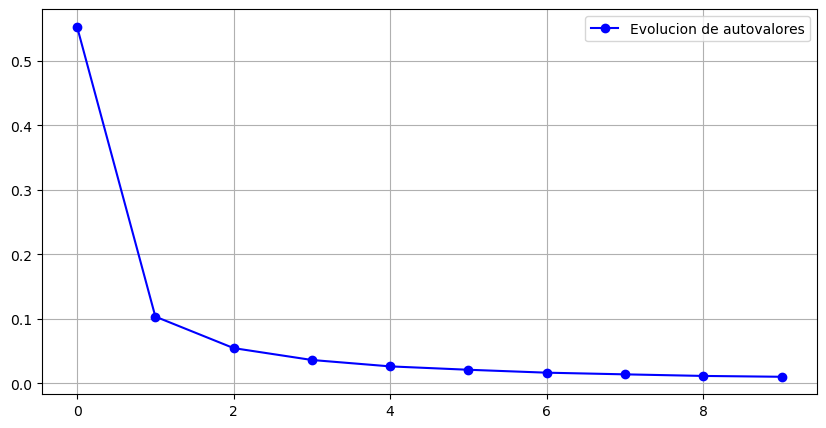

In [144]:
fig,ax = plt.subplots(figsize = (10,5))
plt.plot(fvar_tn10[:10],color='Blue',marker='o',label='Evolucion de autovalores')
plt.legend()
plt.grid()

In [145]:
PC=np.dot(tn10_primavera_sin_nan,eof_tn10[:,:4])

In [146]:
PC.shape

(114, 4)

In [147]:
PCs=(PC-np.mean(PC))/np.std(PC)

In [148]:
modo =1 
PC1s=PCs[:,0:4]
PC1s.shape

(114, 4)

Text(0.5, 1.0, 'Primera componente principal fvar=0.55')

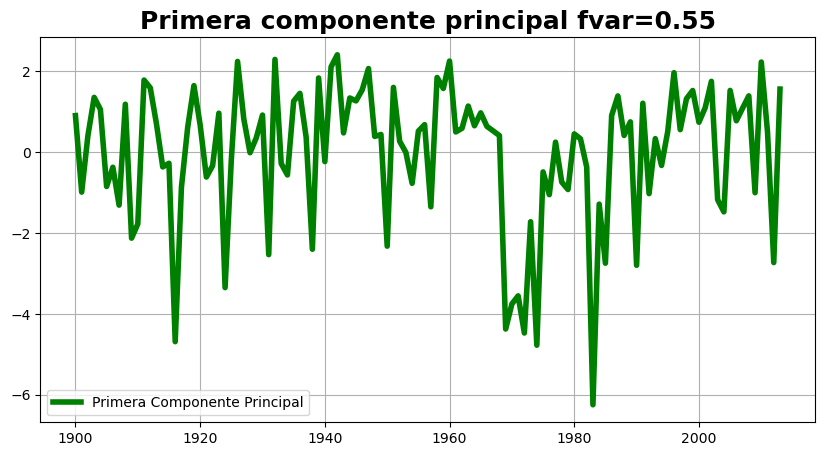

In [149]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1900,2014),PC1s[:,0],linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Primera componente principal fvar='+ str( round(fvar_tn10[0],2)),fontsize=18,weight='bold')


In [150]:
def regresLinSim(x,y):
    alpha = 0.05
    x = np.squeeze(np.array(x))
    y = np.squeeze(np.array(y))
    N = x.size
    xm = x.mean()
    ym = y.mean()
    SXY = np.sum(x * y) - N * xm * ym
    SXX = np.sum(x * x) - N * xm * xm
    SYY = np.sum(y * y) - N * ym * ym
    SSR = SXY ** 2 / SXX 
    a1 = SXY / SXX
    a0 = ym - xm * a1
    yhat =  a0 + a1 * x
    e = y - yhat
    R2 = SSR / SYY
    SSE = SYY - SSR
    rho = SXY / np.sqrt(SXX*SYY)
    Se = np.sqrt( SSE / (N - 2 ) )
    t = stats.t.ppf(1-alpha/2,N-2)
    IC_a1 = a1 + np.array([-1, 1]) * t * Se / np.sqrt(SXX)
    IC_a0 = a0 + np.array([-1, 1]) * t * Se * np.sqrt(np.sum(x*x)/N/SXX)
    xvec = np.linspace(x.min(),x.max(),100)
    muY = ym + a1 * (xvec - xm) 
    AmuY = t * Se * np.sqrt(1/N + (xvec-xm) * (xvec -xm) /SXX)
    AY = t * Se * np.sqrt( 1 + 1/N + (xvec-xm) * (xvec -xm) /SXX)
    fig,ax = plt.subplots(1,2,figsize=(18,8))
    ax[0].plot(x,y,'o',markeredgecolor='black',markeredgewidth=1)
    #ax[0].grid()
    ax[0].plot(xvec,muY+AmuY,color='orange')
    ax[0].plot(xvec,muY-AmuY,color='orange')
    ax[0].plot([x.min(), x.max()],[a0+a1*x.min(), a0+a1*x.max()],'r')
    ax[0].plot(xvec,muY+AY,color='k')
    ax[0].plot(xvec,muY-AY,color='k')
    ax[0].set_title('Simple Linear Regression')
    ax[0].set_ylabel('y')
    ax[0].set_xlabel('x')
    ax[0].text(0.5,0.05,r'$a_0$=[%.3f,%.3f]''\n'r'$a_1$=[%.3f,%.3f]''\n'r'$\rho =$ %.2f'%(IC_a0[0],IC_a0[1],IC_a1[0],IC_a1[1],rho), 
                transform=ax[0].transAxes,size=11,bbox=dict(boxstyle='round', facecolor='w', alpha=0.7))
    #ax[0].text(0.5,0.1,'a1=[%.3f,%.3f]'%(IC_a1[0],IC_a1[1]), transform=ax[0].transAxes)
    #ax[0].text(0.5,0.15,'rho=%.2f'%(rho), transform=ax[0].transAxes)
    ax[1].plot(yhat,e/Se,'o',markeredgecolor='black',markeredgewidth=1)
    #ax[1].grid()
    ax[1].set_xlabel(r'$\hat{y}$')
    ax[1].set_ylabel(r'$\hat{e}/\sigma_E$')
    ax[1].set_title('Standardized residuals')
    return ax, a1, a0, rho, IC_a1, IC_a0, muY, AmuY, AY

Text(0.5, 1.0, 'segunda componente principal fvar=0.1')

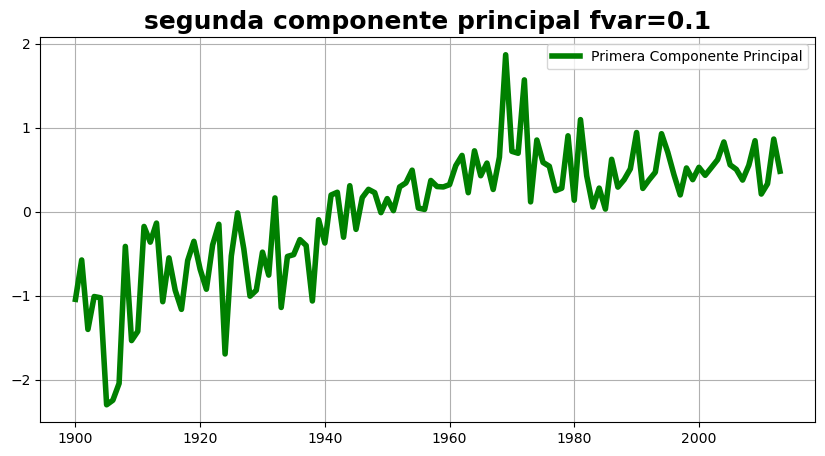

In [151]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1900,2014),PC1s[:,1],linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('segunda componente principal fvar='+ str( round(fvar_tn10[1],2)),fontsize=18,weight='bold')


Text(0.5, 1.0, 'Tercera componente principal fvar=0.05')

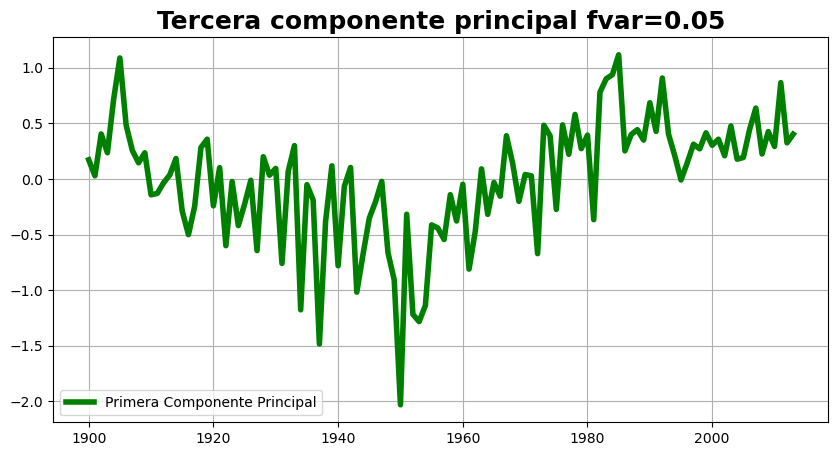

In [152]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1900,2014),PC1s[:,2],linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Tercera componente principal fvar='+ str( round(fvar_tn10[2],2)),fontsize=18,weight='bold')


In [153]:
nyc=12
n=10
Wn=2*1/nyc
b,a=signal.butter(n, Wn, btype='low', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
low = signal.filtfilt(b,a,PC1s[:,0])

b,a=signal.butter(n, Wn, btype='high', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
high = signal.filtfilt(b,a,PC1s[:,0])

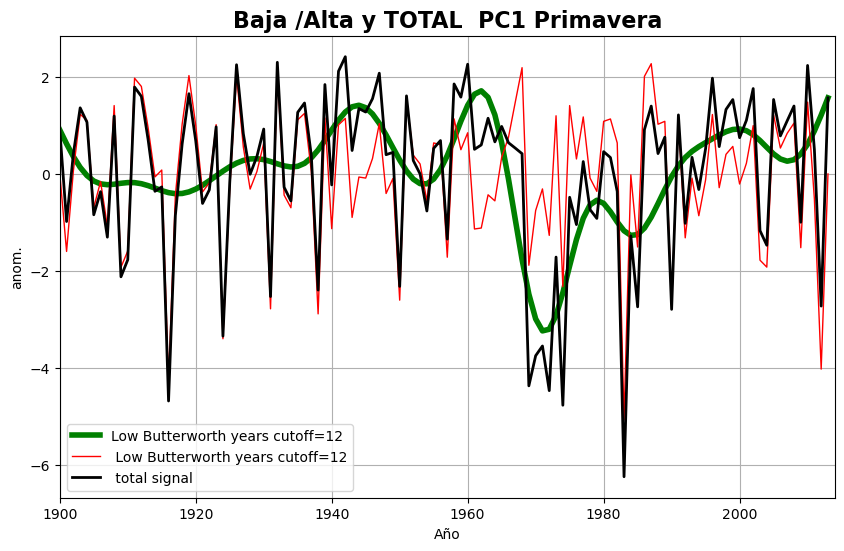

In [154]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_title('Baja /Alta y TOTAL  PC1 Primavera',fontsize=16,weight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('anom.')
ax.plot(range(1900,2014),low,linewidth= 4,color='green',label='Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),high,linewidth= 1,color='red',label=' Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),PC1s[:,0],linewidth= 2,color='black',label=' total signal')
ax.set_xlim([1900,2014])
ax.legend()
ax.grid()

In [155]:
nyc=12
n=10
Wn=2*1/nyc
b,a=signal.butter(n, Wn, btype='low', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
low = signal.filtfilt(b,a,PC1s[:,2])

b,a=signal.butter(n, Wn, btype='high', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
high = signal.filtfilt(b,a,PC1s[:,2])

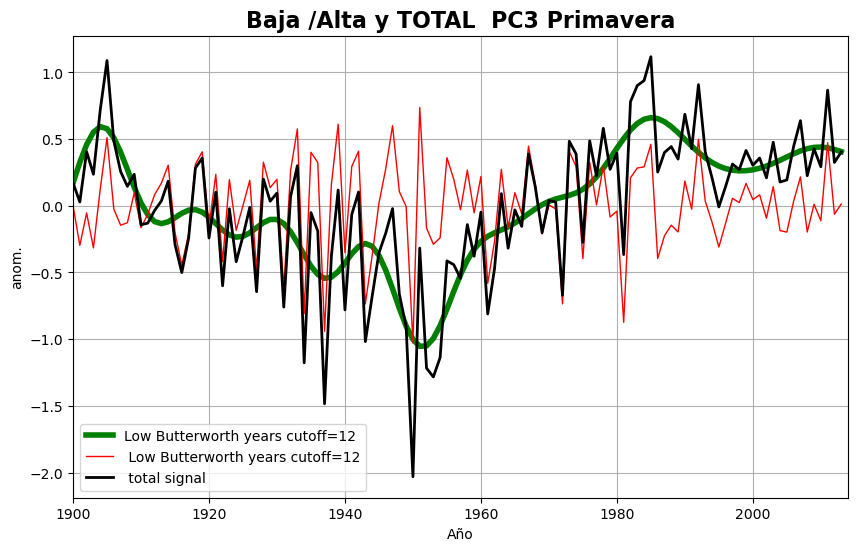

In [156]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_title('Baja /Alta y TOTAL  PC3 Primavera',fontsize=16,weight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('anom.')
ax.plot(range(1900,2014),low,linewidth= 4,color='green',label='Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),high,linewidth= 1,color='red',label=' Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),PC1s[:,2],linewidth= 2,color='black',label=' total signal')
ax.set_xlim([1900,2014])
ax.legend()
ax.grid()

In [157]:
def pearsonr_2D(y, x):
    upper = np.sum((x - np.mean(x)) * (y - np.mean(y, axis=1)[:,None]), axis=1)
    lower = np.sqrt(np.sum(np.power(x - np.mean(x), 2)) * np.sum(np.power(y - np.mean(y, axis=1)[:,None], 2), axis=1))
    rho = upper / lower
    return rho

def IndexRegrCorr(Data,Index,alfa,sig,pp):
    try:
        [ns,nt]=Data.shape # n1=espacio, n2=tiempo
    except ValueError:
        # si Data es un índice
        ns=1
        nt=len(Data)
        Data = np.array([Data])
        
    cor=ma.empty([ns,])
    Pvalue=ma.empty([ns,])
    #Index tiene que estar estandarizado, es decir, dividido por la desviación tipica
    reg=np.dot(Data,Index)/(nt-1)
    
    for nn in range(ns): 
        bb=pearsonr(Data[nn,:],Index) 
        cor[nn]=bb[0]
        Pvalue[nn]=bb[1]

    if sig == 'test-t':
        cor_sig=ma.masked_where(Pvalue>alfa,cor)
        reg_sig=ma.masked_where(Pvalue>alfa,reg)
        
    if sig == 'MonteCarlo':
        corp = ma.empty([ns,pp])
        for p in range(pp):
            corp[:,p] = pearsonr_2D(Data,np.random.permutation(Index))
            # aquí uso la función pearsonr_2D y me ahorro un bucle en ns
        
        for nn in range(ns): 
            hcor = np.count_nonzero((cor[nn]>0)&(corp[nn,:]<cor[nn])|(cor[nn]<0)&(corp[nn,:]>cor[nn]))
            # nivel de confianza
            Pvalue[nn] = hcor/pp
            
        cor_sig = ma.masked_where(Pvalue<(1-alfa),cor)
        reg_sig = ma.masked_where(Pvalue<(1-alfa),reg)
        
    return cor,Pvalue,cor_sig,reg,reg_sig

def dibujo_1_mapa_cartopy(A,lon,lat,levs,cmap1,l1,titulo, ax):
    im=ax.contourf(lon,lat,A
                   ,cmap=cmap1,levels=levs,extend='both',transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=2);
    ax.set_title(titulo,fontsize=28)
    cbar = plt.colorbar(im, extend='neither', spacing='proportional',
                orientation='vertical', shrink=0.7, format="%2.1f")
    cbar.set_label(l1, size=28)
    cbar.ax.tick_params(labelsize=28) 
# Esta función te sirve para dibujar en una misma figura dos mapas superpuestos, como podría ser
# el caso de un mapa A de regresion y un mapa B de correlacion significativa, del que solo te interesa
# las regiones donde es significativa la señal
def dibujo_2_mapas_cartopy_hatches(A,B,lon,lat, levs, cmap1, l1, t1):

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
    
    im = ax.contourf(lon,lat,A.reshape(len(lat),len(lon)), 
                     extend='both',cmap=cmap1,levels=levs,transform = ccrs.PlateCarree())

    ax.coastlines(linewidth=2); 
    fig.colorbar(im,ax=ax,label = l1) #Para la barra de colores
    im = ax.contourf(lon,lat,B.reshape(len(lat),len(lon))
                 ,extend='both'
                 ,hatches='.',cmap=cmap1,alfa=0,levels=levs,transform = ccrs.PlateCarree())
    #el uso de alfa=0 lo que hace es que solo salgan los puntos y no salgan los colors porque los pones totalmente transparentes
    ax.set_ylim(lat[-1], lat[0])
    ax.set_xlim(lon[0], lon[-1])

In [158]:
PC1s.shape

(114, 4)

In [159]:
cor1,Pvalue1,cor_sig1,reg1,reg1_sig=IndexRegrCorr(np.transpose(tn10_primavera_sin_nan),np.transpose(PC1s[:,0]),0.01,'MonteCarlo',100)
cor2,Pvalue2,cor_sig2,reg2,reg2_sig=IndexRegrCorr(np.transpose(tn10_primavera_sin_nan),np.transpose(PC1s[:,1]),0.01,'MonteCarlo',100)
cor3,Pvalue3,cor_sig3,reg3,reg3_sig=IndexRegrCorr(np.transpose(tn10_primavera_sin_nan),np.transpose(PC1s[:,2]),0.01,'MonteCarlo',100)

In [160]:
mat=np.expand_dims((tn10_primavera_anomalia)[0],axis=0)


In [161]:
reg1_final=pongonans(np.squeeze(reg1),mat)
reg_sig_1_final=pongonans(np.squeeze(reg1_sig),mat)

cor1_final=pongonans(np.squeeze(cor1),mat)
cor_sig1_final=pongonans(np.squeeze(cor_sig1),mat)

In [227]:
print(reg1.shape)
print(reg1_final.shape)

(5049,)
(95, 115)


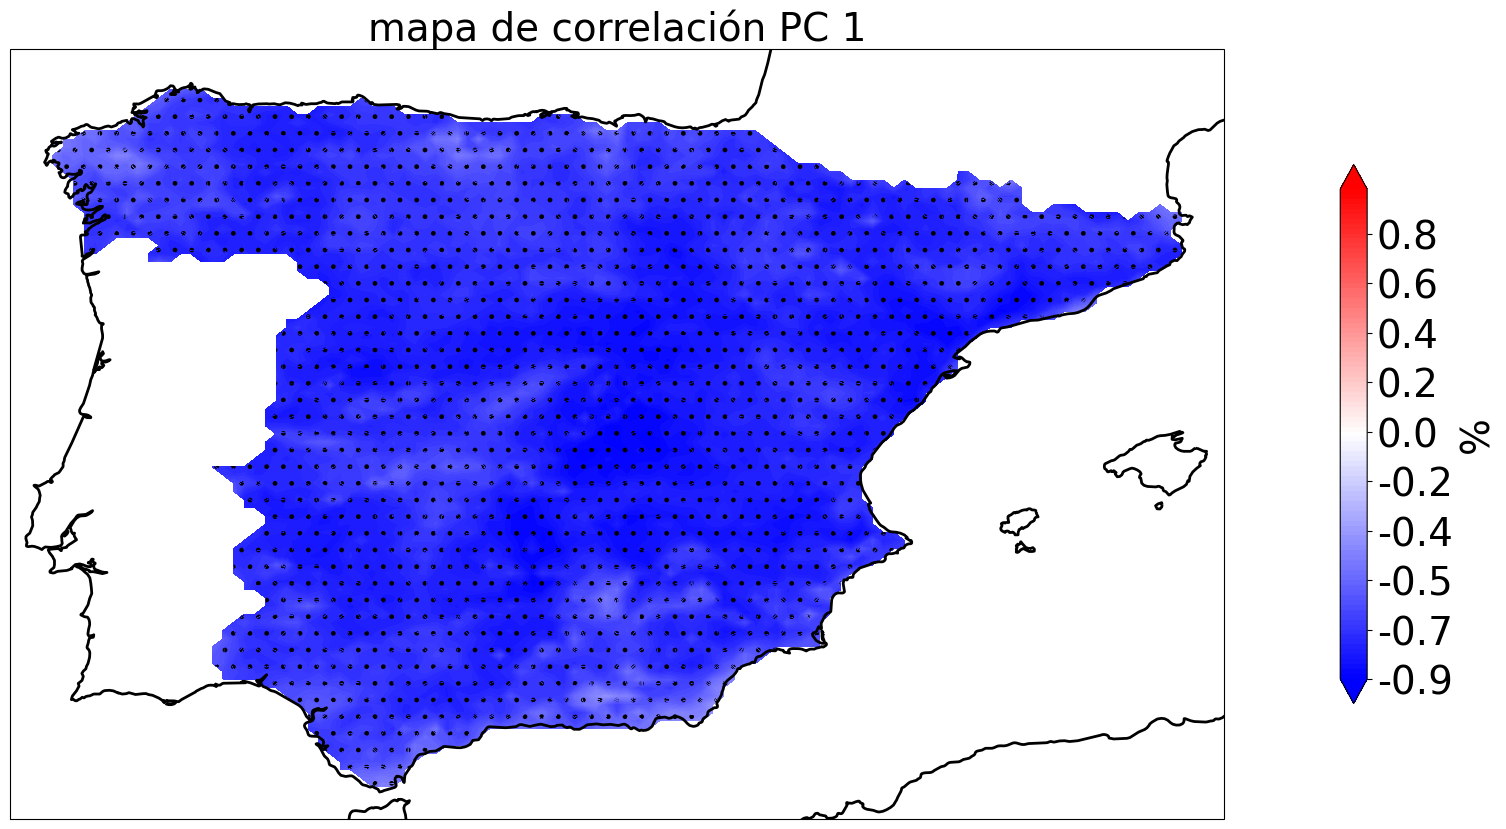

In [162]:
rango_reg=max(abs(np.nanmin(cor1_final)),abs(np.nanmax(cor1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(cor1_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de correlación PC 1', ax)
ax.contourf(lon,lat,np.reshape(cor_sig1_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')
  

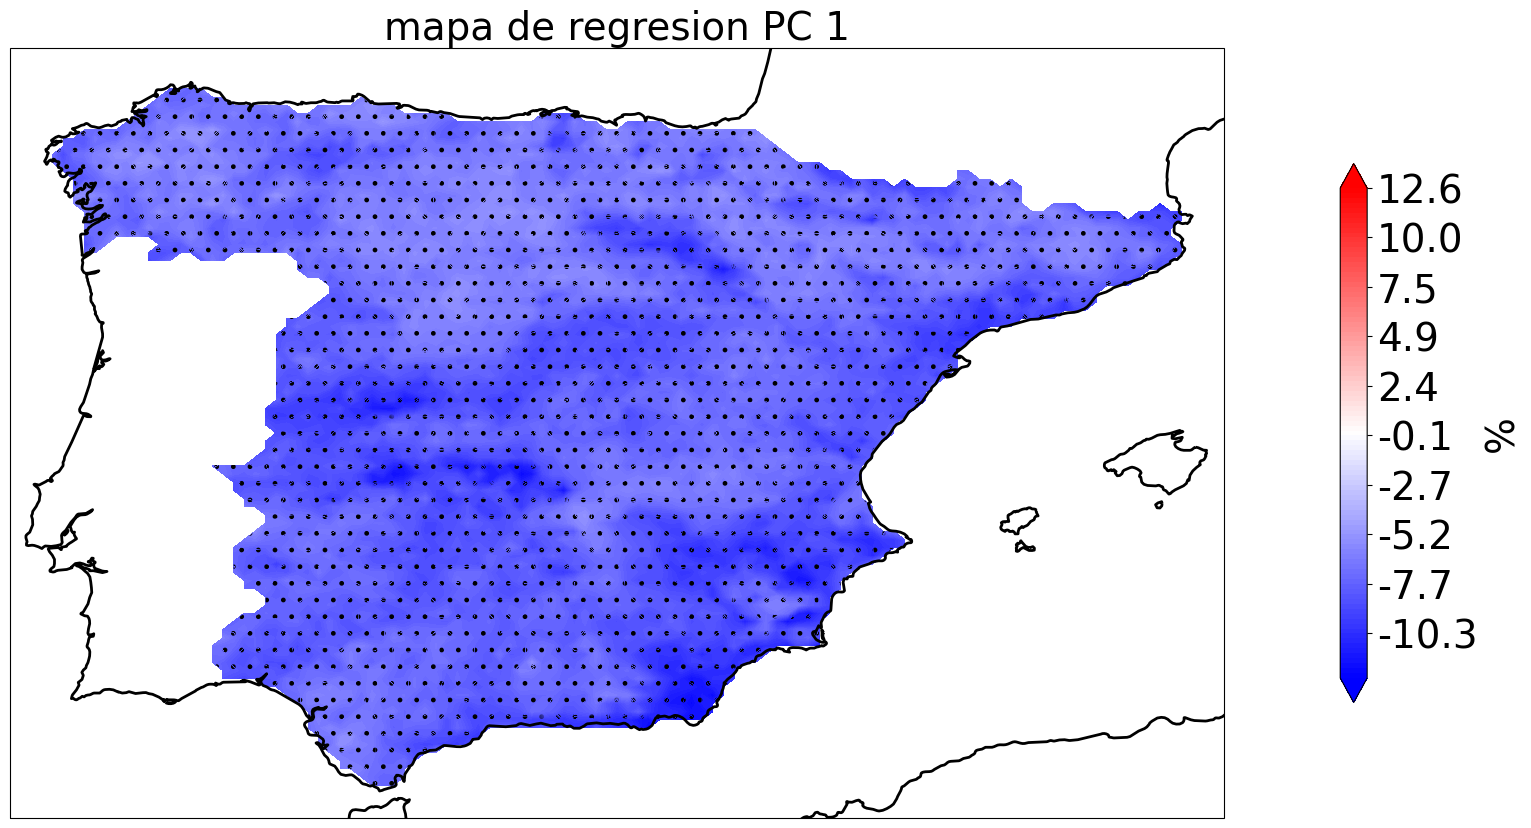

In [163]:
rango_reg=max(abs(np.nanmin(reg1_final)),abs(np.nanmax(reg1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg1_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 1', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_1_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

(-0.9989038244520912, 9.00455224610909e-151)


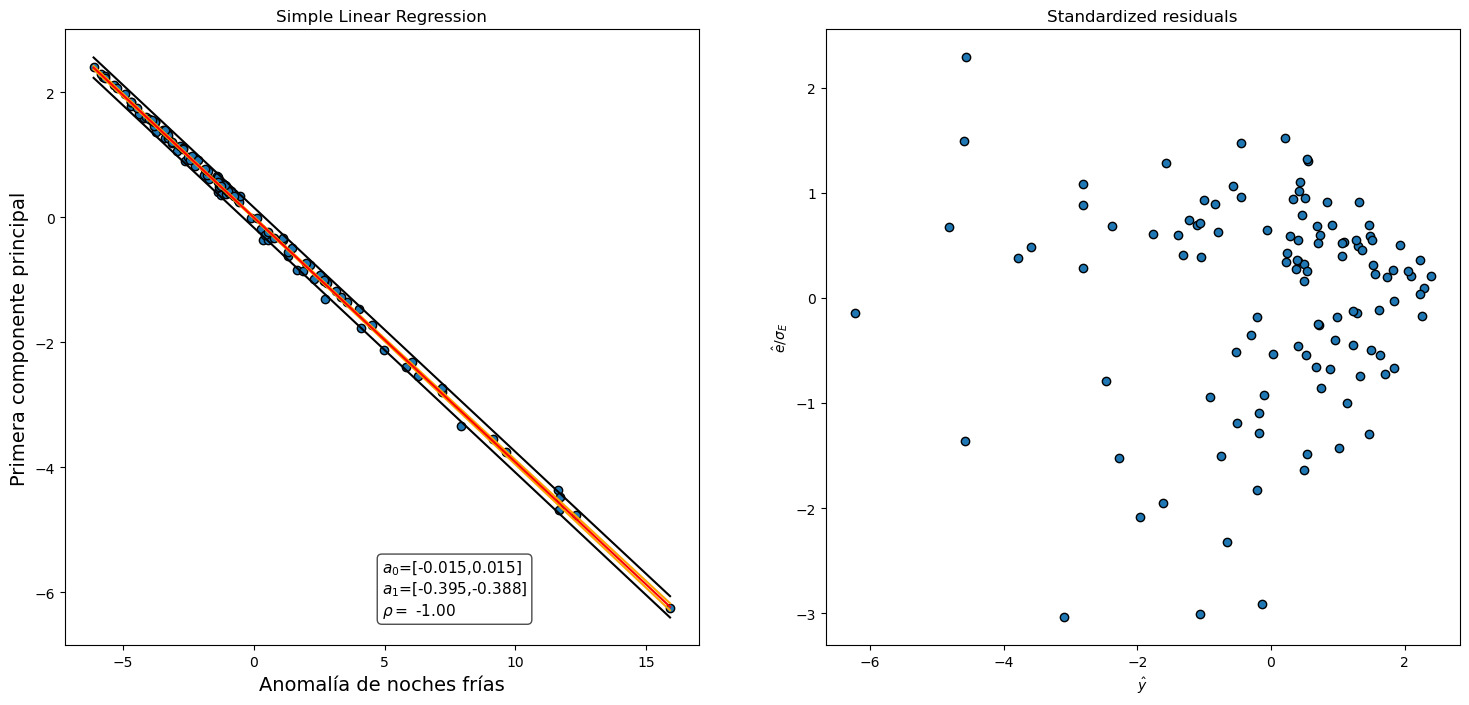

In [164]:
ax, a1, a0, rho, IC_a1, IC_a0, muY, AmuY, AY = regresLinSim(np.nanmean(tn10_primavera_anomalia,axis=(1,2)),PC1s[:,0])
ax[0].set_xlabel('Anomalía de noches frías',size=14)
ax[0].set_ylabel('Primera componente principal',size=14)
print(pearsonr(np.nanmean(tn10_primavera_anomalia,axis=(1,2)),PC1s[:,0]))

Text(0.5, 1.0, 'Serie anomalías de noches frías (primavera)')

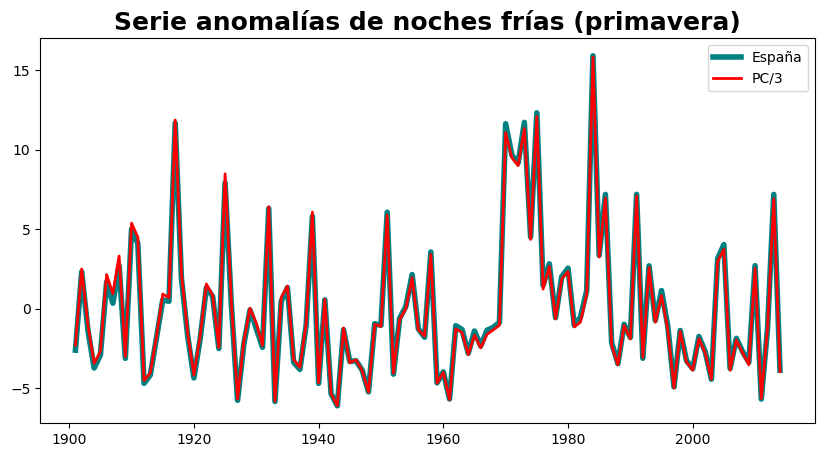

In [165]:

fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1901,2014+1),np.nanmean(tn10_primavera_anomalia,axis=(1,2)),linewidth= 4,color='teal',label='España')

var = np.nanmean(np.squeeze(reg1_final))

ax.plot(range(1901,2014+1),PC1s[:,0]*var/3,linewidth= 2,color='r',label='PC/3')


ax.legend()
ax.set_title('Serie anomalías de noches frías (primavera)',fontsize=18,weight='bold')

In [166]:
reg2_final=pongonans(np.squeeze(reg2),mat)
reg_sig_2_final=pongonans(np.squeeze(reg2_sig),mat)

cor2_final=pongonans(np.squeeze(cor2),mat)
cor_sig2_final=pongonans(np.squeeze(cor_sig2),mat)

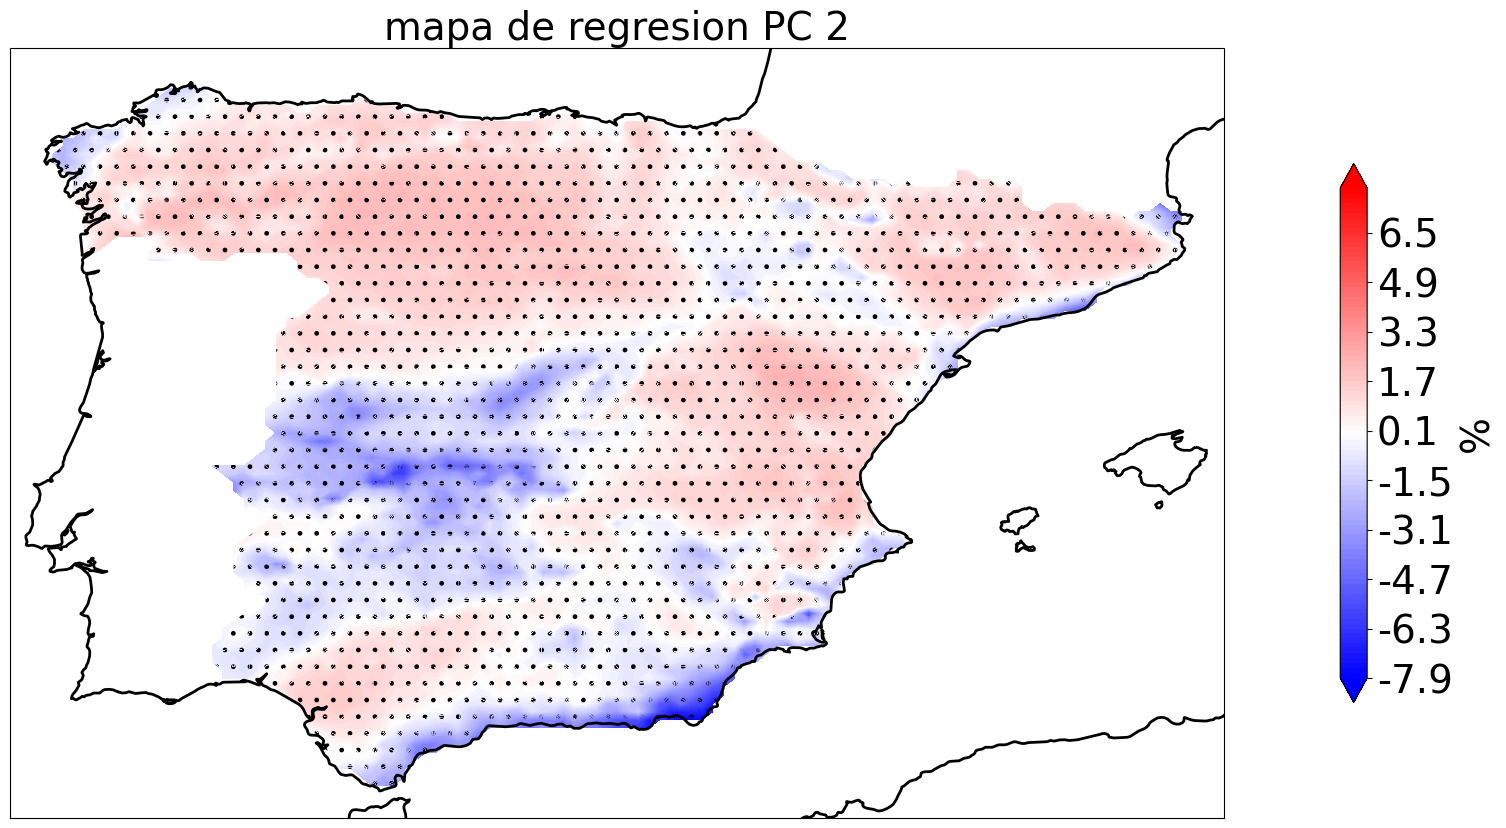

In [167]:
rango_reg=max(abs(np.nanmin(reg2_final)),abs(np.nanmax(reg_sig_2_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg2_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 2', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_2_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

In [168]:
reg3_final=pongonans(np.squeeze(reg3),mat)
reg_sig_3_final=pongonans(np.squeeze(reg3_sig),mat)


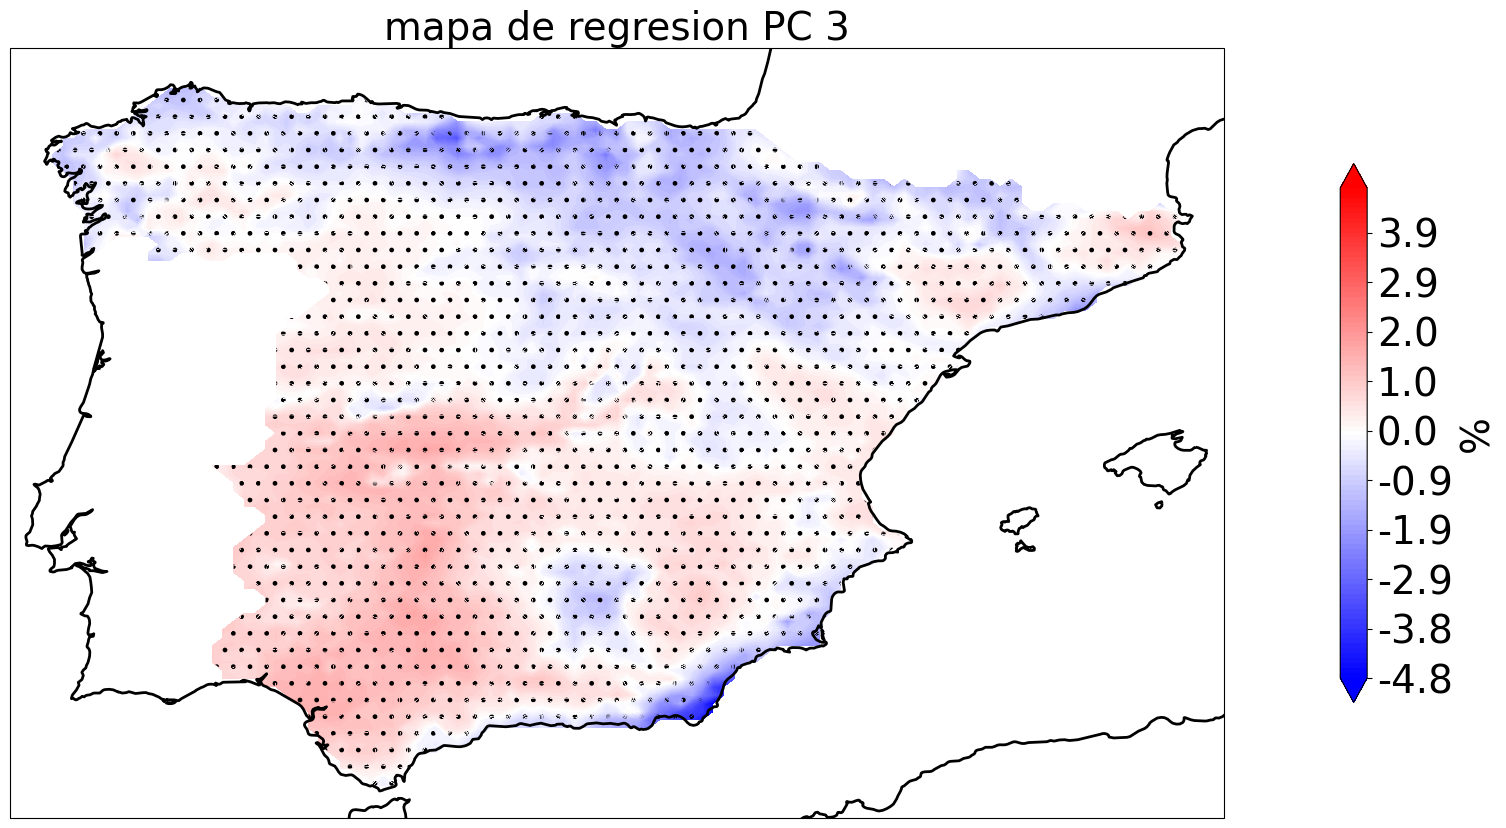

In [169]:
rango_reg=max(abs(np.nanmin(reg3_final)),abs(np.nanmax(reg_sig_3_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg3_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 3', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_3_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

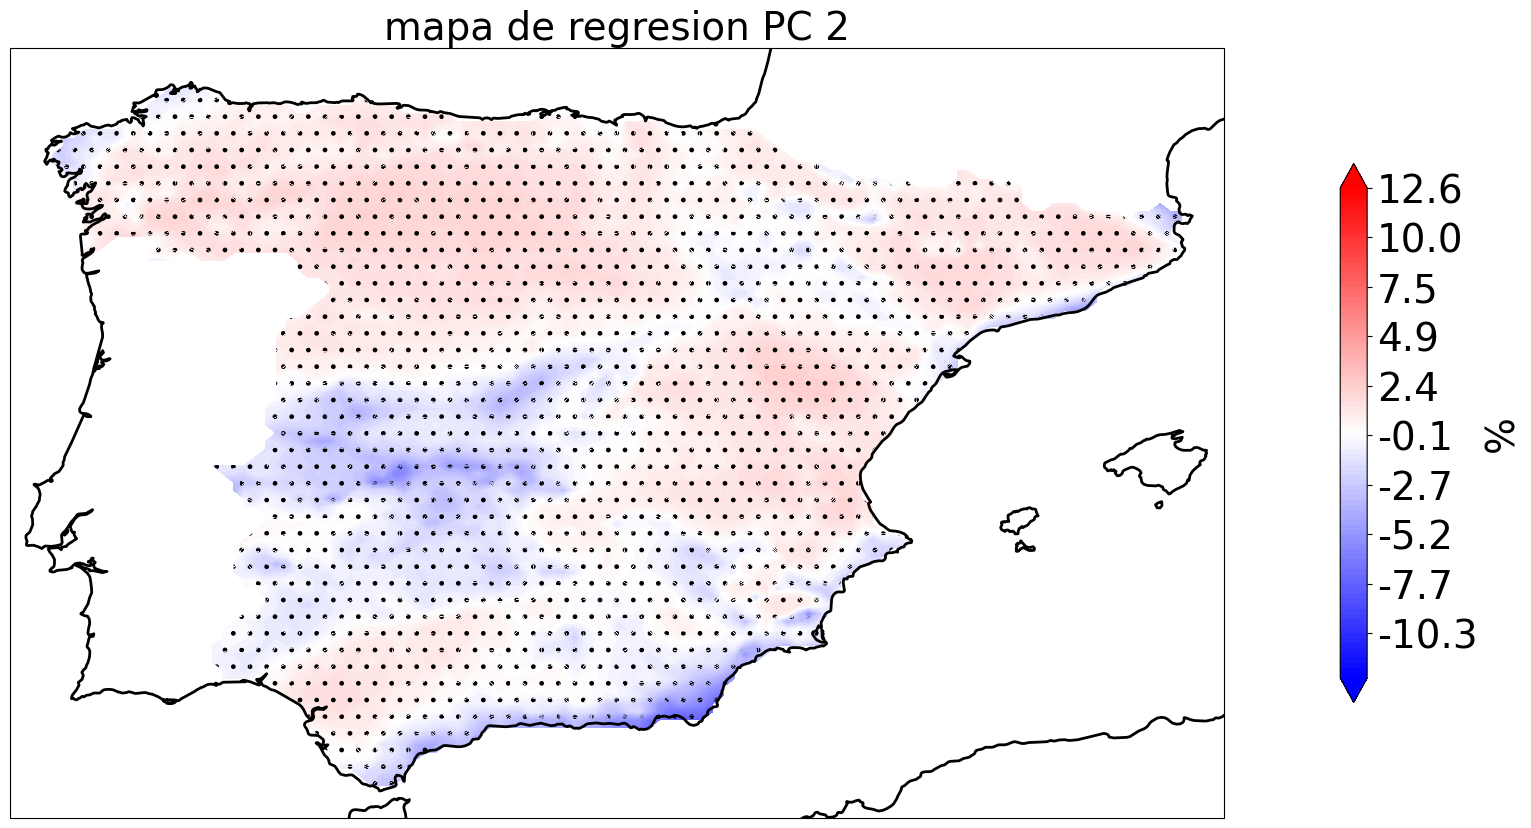

In [170]:
rango_reg=max(abs(np.nanmin(reg1_final)),abs(np.nanmax(reg1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg2_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 2', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_2_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

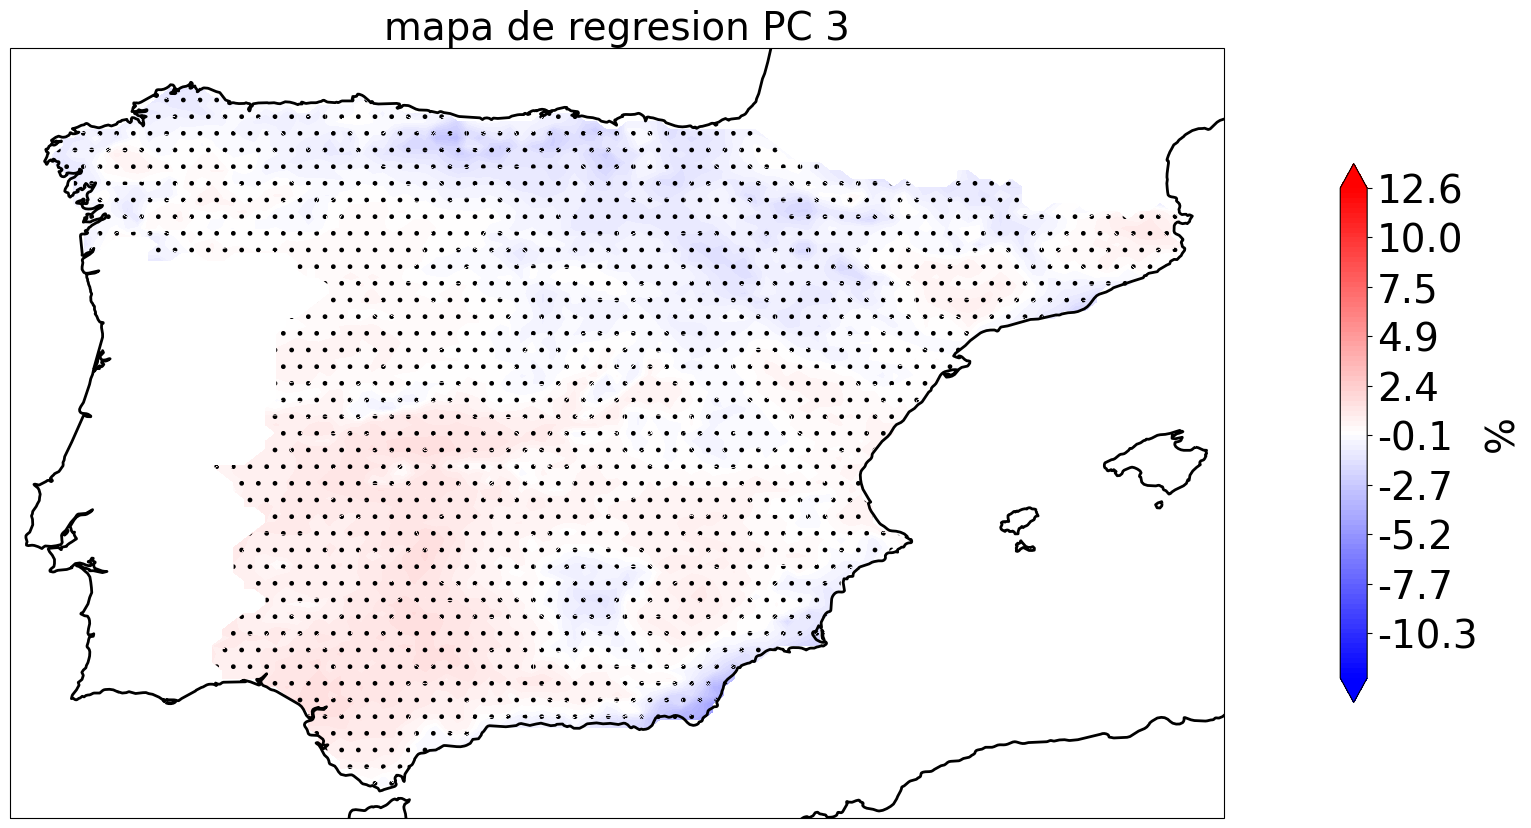

In [171]:
rango_reg=max(abs(np.nanmin(reg1_final)),abs(np.nanmax(reg1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg3_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 3', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_3_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

Mapas de regresión de las PCS 2 y 3 usando la misma leyenda que para la PC1

In [172]:

tn10_remallado_prim_new=np.reshape(np.array(tn10_remallado_prim), (int(nt/3),3,nlat,nlon)).mean(axis=1)

In [284]:
yrs=np.linspace(1901,2014,114)
yrs

array([1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909.,
       1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918.,
       1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927.,
       1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014.])

In [285]:
yr1974=tn10_primavera_anomalia[yrs==1974]

Text(0.5, 1.0, 'Anom 1974')

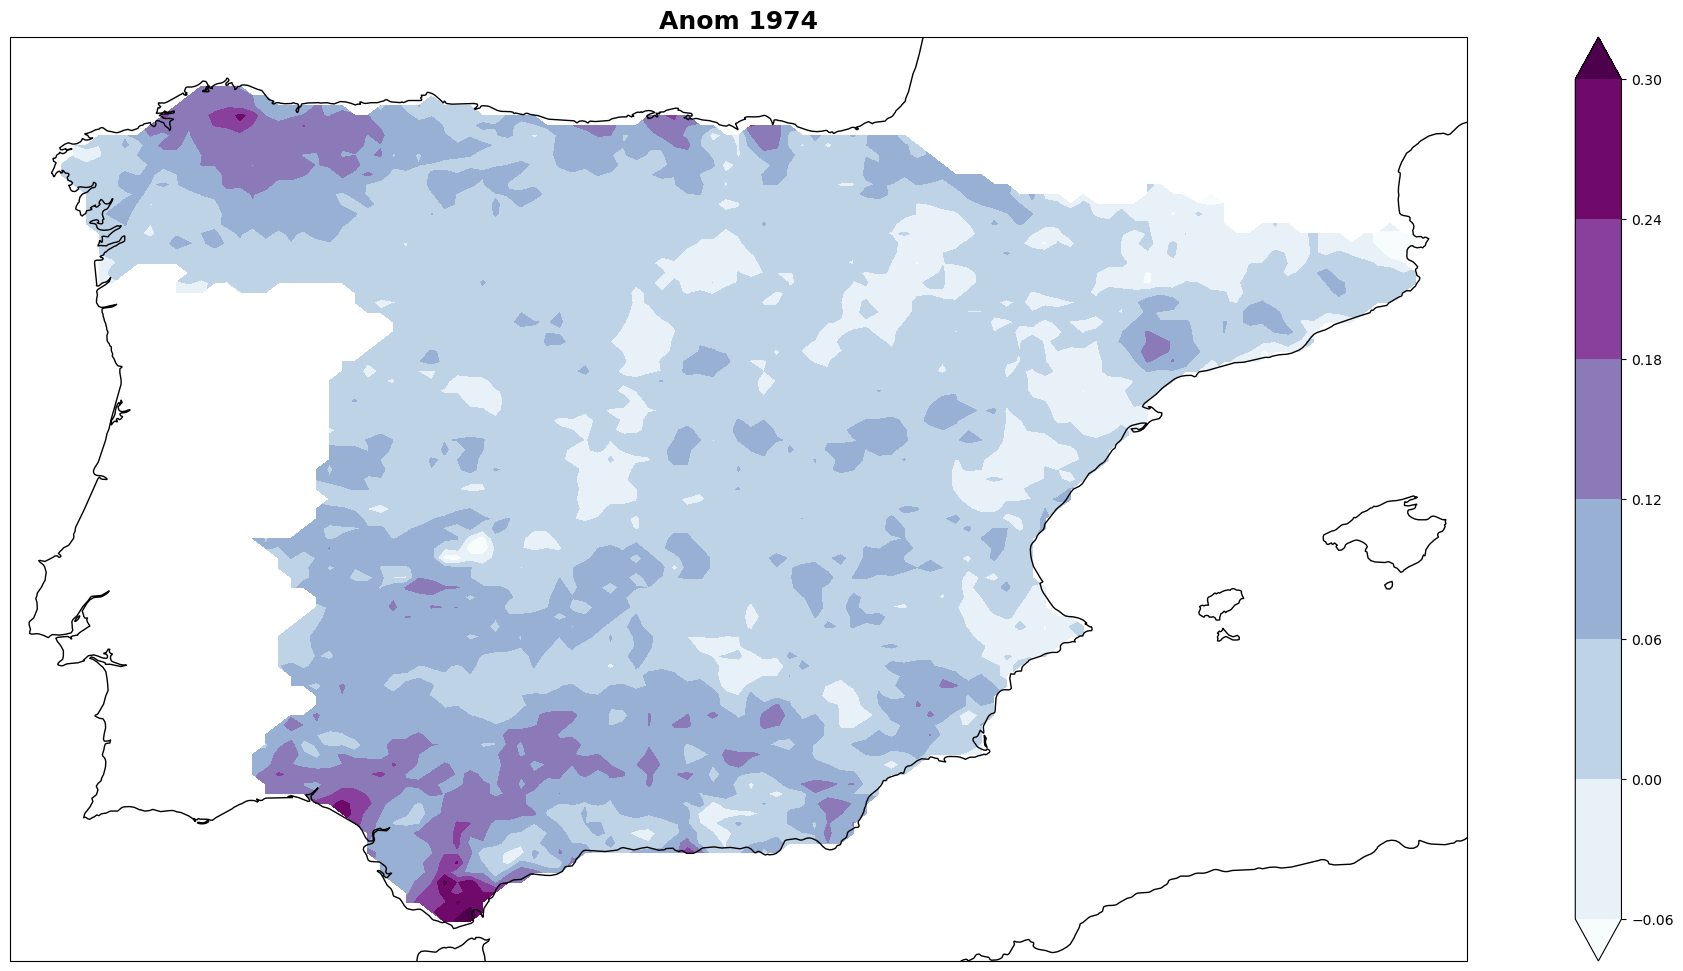

In [286]:

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,yr1974.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anom 1974',fontsize=18,weight='bold')

In [287]:
yr1997=tn10_primavera_anomalia[yrs==1997]

In [325]:
tn10_primavera_anomalia.shape

(114, 95, 115)

In [323]:
yr1997.shape

(1, 95, 115)

Text(0.5, 1.0, 'Anom 1997')

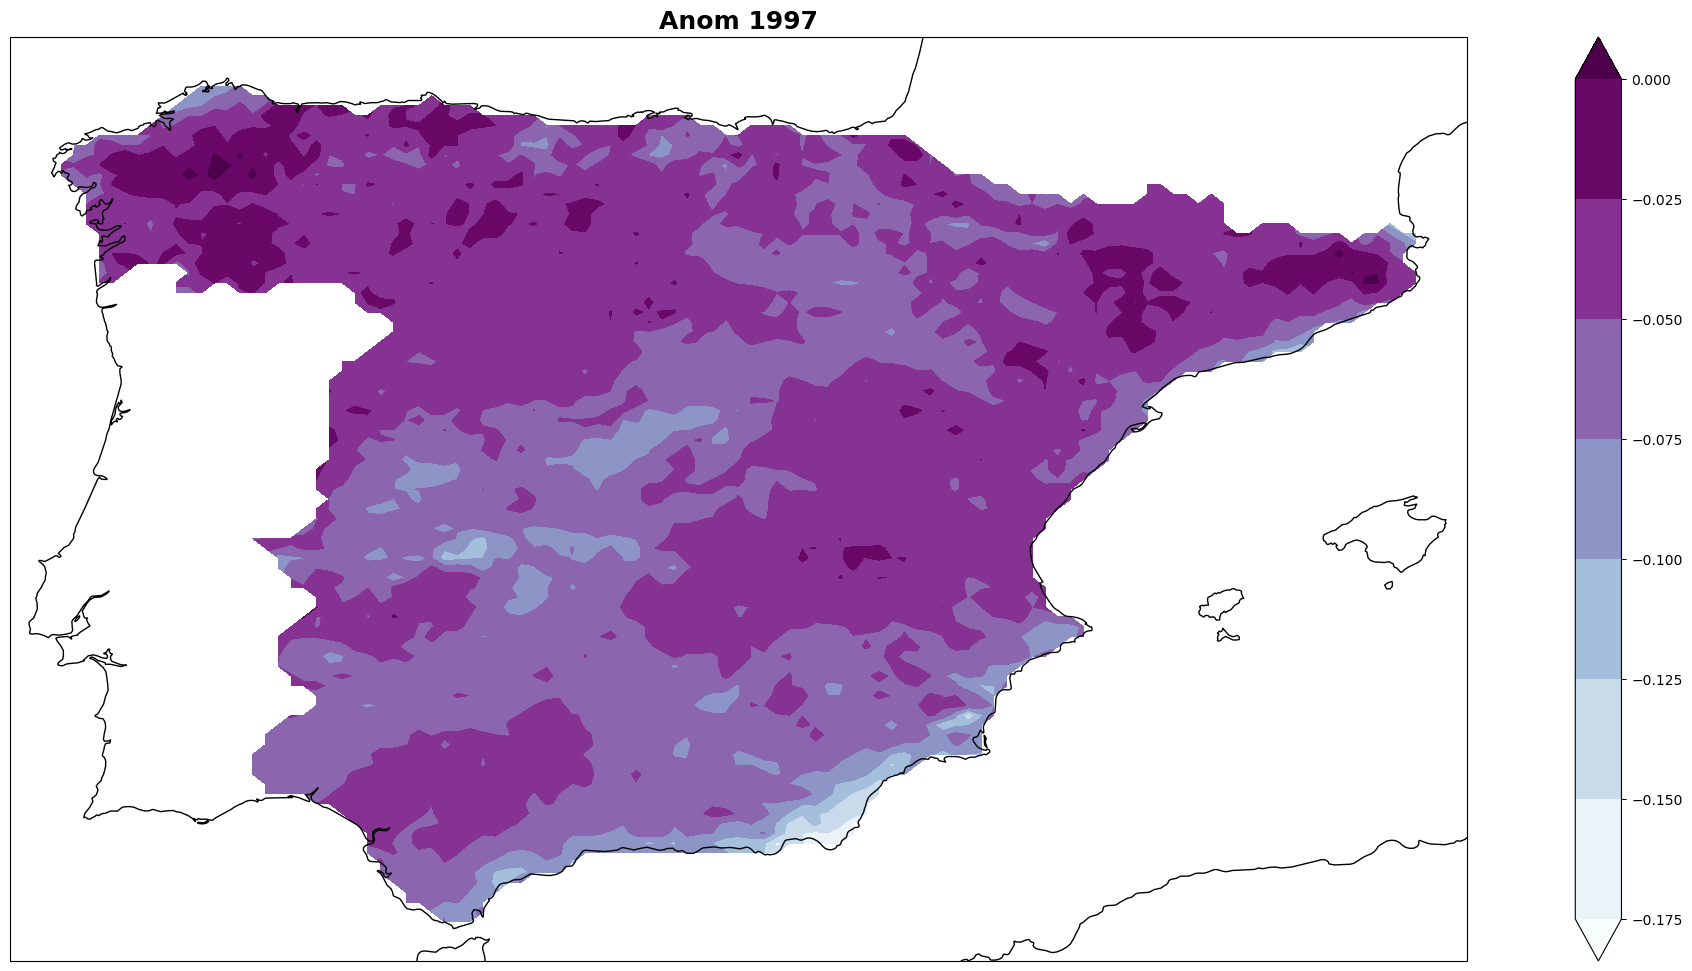

In [288]:


fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,yr1997.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anom 1997',fontsize=18,weight='bold')

In [326]:
lon=tn10_remallado.lon
lat=tn10_remallado.lat


(114, 5049)

In [328]:
tn10_primavera_anomalia.shape

(114, 5049)

In [331]:
yr1984=tn10_primavera_anomalia[yrs==1984]

Text(0.5, 1.0, 'Anom yr1984')

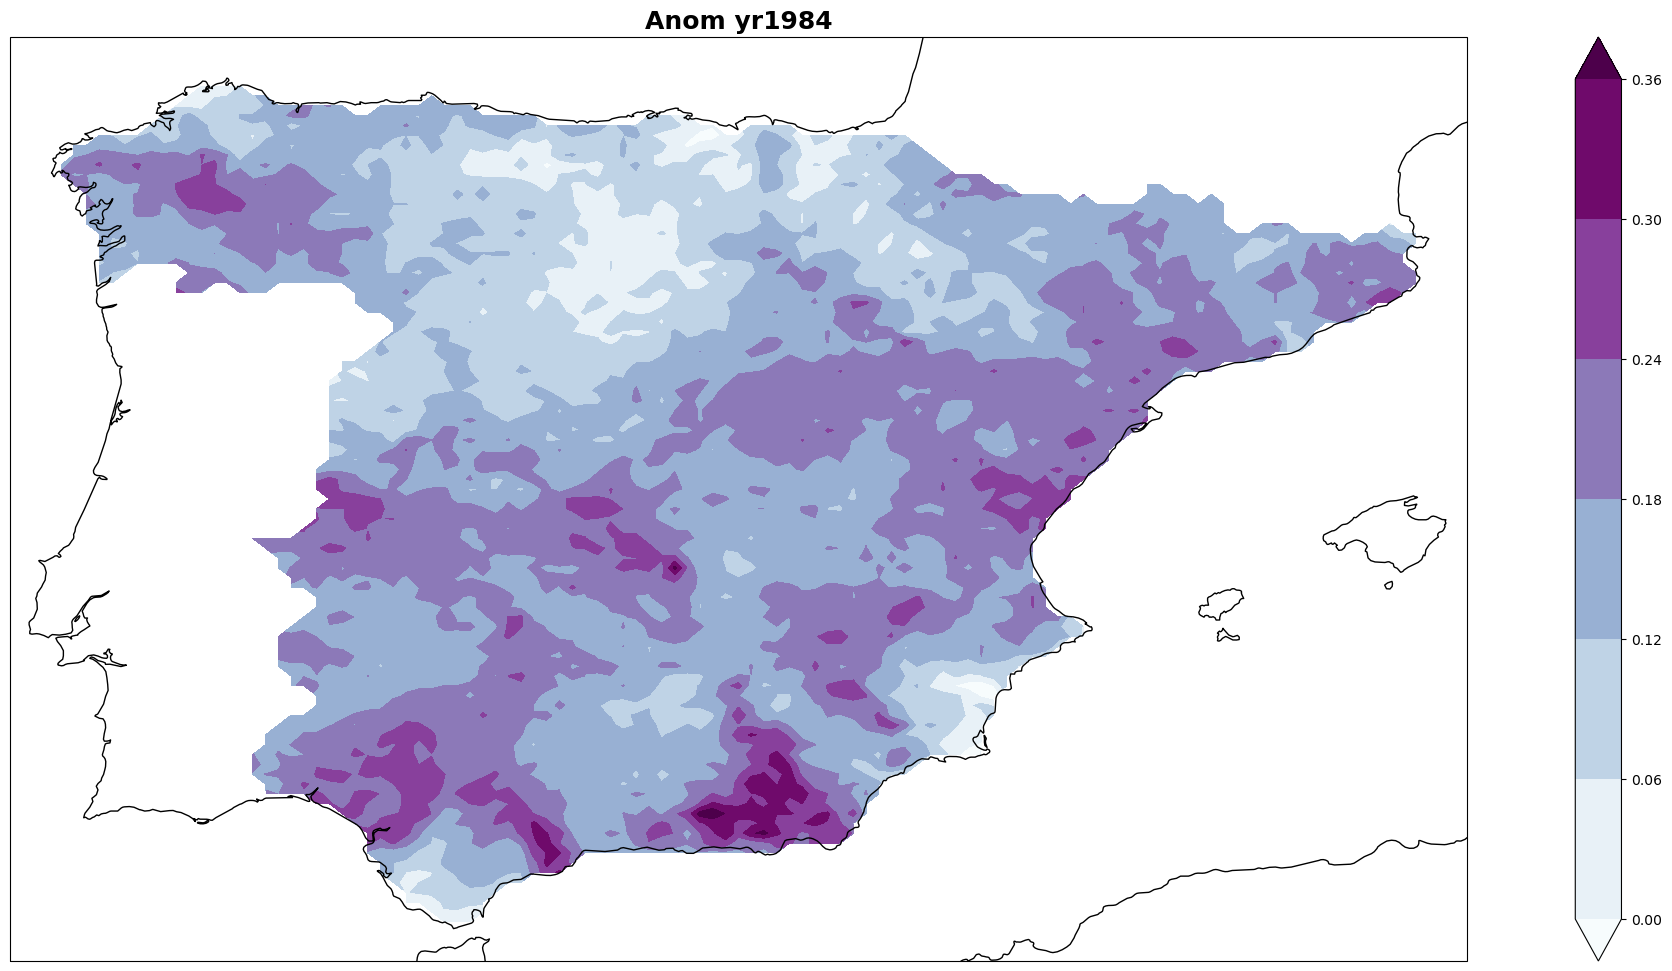

In [332]:


fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,yr1984.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anom yr1984',fontsize=18,weight='bold')

La primavera de 1997 fue una de las más cálidas regrista desde el 1961. Seguida de la del 2006, 2011 y 2014.

# MAPAS DE ANOMALÍA SLP PARA ESTAS DOS PRIMAVERAS 

In [178]:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
file ='slp_ERA20_1900-2010.nc'
vari=xr.open_dataset(path+file)

In [179]:
lon = vari.longitude
lat = vari.latitude
SLP = vari.msl
nm = 12
nyears = int(vari.time.shape[0]/nm)

In [180]:
yrs=np.linspace(1900,2010,111)

In [181]:
yrs

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
       1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
       1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010.])

In [182]:
def region(A,lon,lat,lonmin,lonmax,latmin,latmax):
    nt, nlat, nlon = A.shape
    #lonmin,lonmax,latmin,latmax = 260, 360, 10, 75
    AN = A[:,:,(lon>lonmin)&(lon<lonmax)][:,(lat>latmin)&(lat<latmax),:]
    lon_AN= lon[(lon>lonmin)&(lon<lonmax)]
    lat_AN=lat[(lat>latmin)&(lat<latmax)]
    return lat_AN, lon_AN, AN

In [183]:
lat_AN, lon_AN, AN=region(SLP,lon,lat, 260, 360, 10, 75)

In [184]:
AN_spring=AN.groupby('time.season')['MAM']

In [185]:
AN_spring_ano=AN_spring-AN_spring.mean(axis=0)

In [186]:
[nt,nlat,nlon]=AN_spring_ano.shape

In [187]:
AN_spring_ano=np.reshape(np.array(AN_spring_ano), (int(nt/3),3,nlat,nlon)).mean(axis=1)

In [188]:
ATN_winter_ano=np.reshape(AN_spring_ano,(111,nlat*nlon))


In [189]:
Y=ATN_winter_ano[yrs==1974]


Text(0.5, 1.0, 'Anomalía SLP primavera 1974')

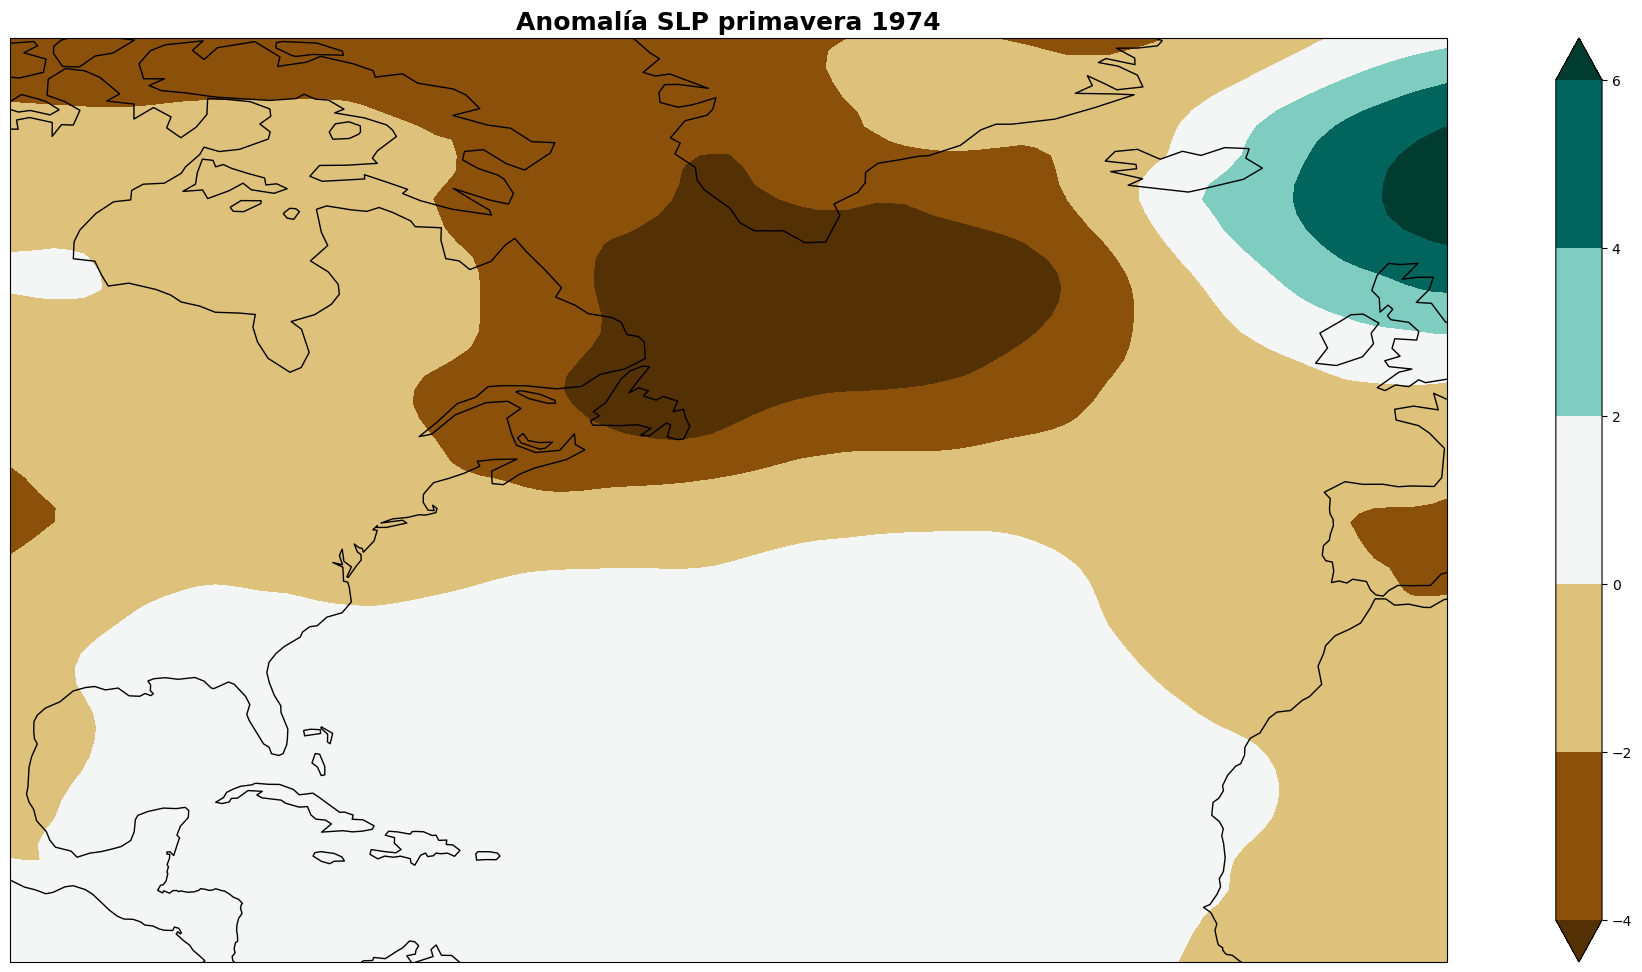

In [190]:
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_AN,lat_AN,Y.reshape(len(lat_AN),len(lon_AN))/100,cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anomalía SLP primavera 1974',fontsize=18,weight='bold')

In [191]:
Z=ATN_winter_ano[yrs==1997]

Text(0.5, 1.0, 'SLP 1997')

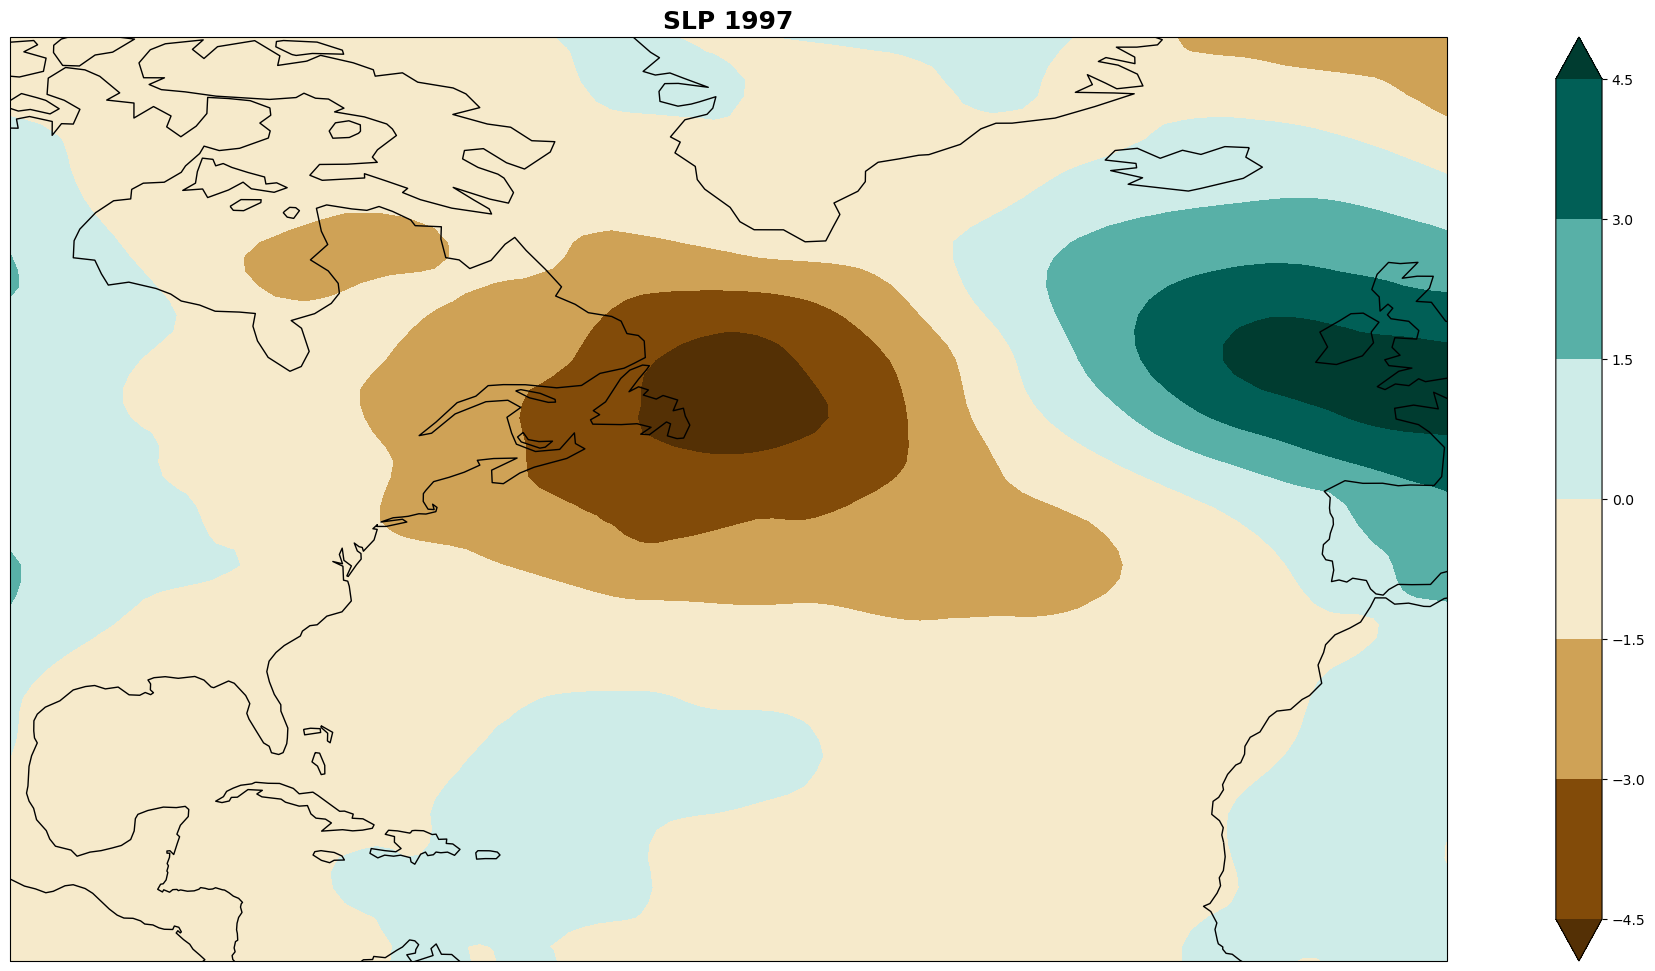

In [192]:
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_AN,lat_AN,Z.reshape(len(lat_AN),len(lon_AN))/100,cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('SLP 1997',fontsize=18,weight='bold')

# Ahora represento la SST para el invierno y la primavera de esos años

In [193]:
def region2(data,lat,lon,lonmin,lonmax,latmin,latmax):
    # data[t,lon,lat]
    latc=lat[(lat>=latmin)&(lat<=latmax)]
    lonc=lon[(lon>=lonmin)&(lon<=lonmax)]
    datac = data[:,:,(lon>=lonmin)&(lon<=lonmax)][:,(lat>=latmin)&(lat<=latmax),:]
    return datac,latc,lonc

In [194]:
#Voy a usar los datos SST y SLP como en la practica 3
#Cargo los datos SST:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
vari='HadISST1_sst_1870-2019.nc'
fil = xr.open_dataset(path+vari)
lon = fil.longitude
lat = fil.latitude
sst = fil.sst
nt, nlat, nlon = sst.shape
nm = 12
nyearssst = int(nt/nm)

lonmin,lonmax,latmin,latmax = -270, -70, -20, 20

SST,lat,lon=region2(sst,lat,lon,lonmin,lonmax,latmin,latmax)
yrsst=np.linspace(1870,2019,150)
SST=SST[:150*12,:,:]
SST=np.array(SST)
SST=np.reshape(SST, (150,12,len(lat),len(lon)))

In [195]:
# reorganizo los datos para que estén en numero de años, numero de meses y espacio
SST=np.reshape(SST, (len(yrsst),12,len(lon)*len(lat)))
#ahora calculo las medias estacionales, por ejemplo del mes 9 (octubre) al mes 1 (febrero)
# es decir tengo una estación extendida
SST_sea,ny1=season(SST,9,1,111)

SST_sea2,ny12=season(SST,2,4,111)

In [196]:
# Ahora voy a calcular las anomalias
#anomalías positivas en la SST nos van a indicar un evento de el niño

SST_sea_an=anom(np.transpose(SST_sea),1,'pp')

SST_sea_an2=anom(np.transpose(SST_sea2),1,'pp')

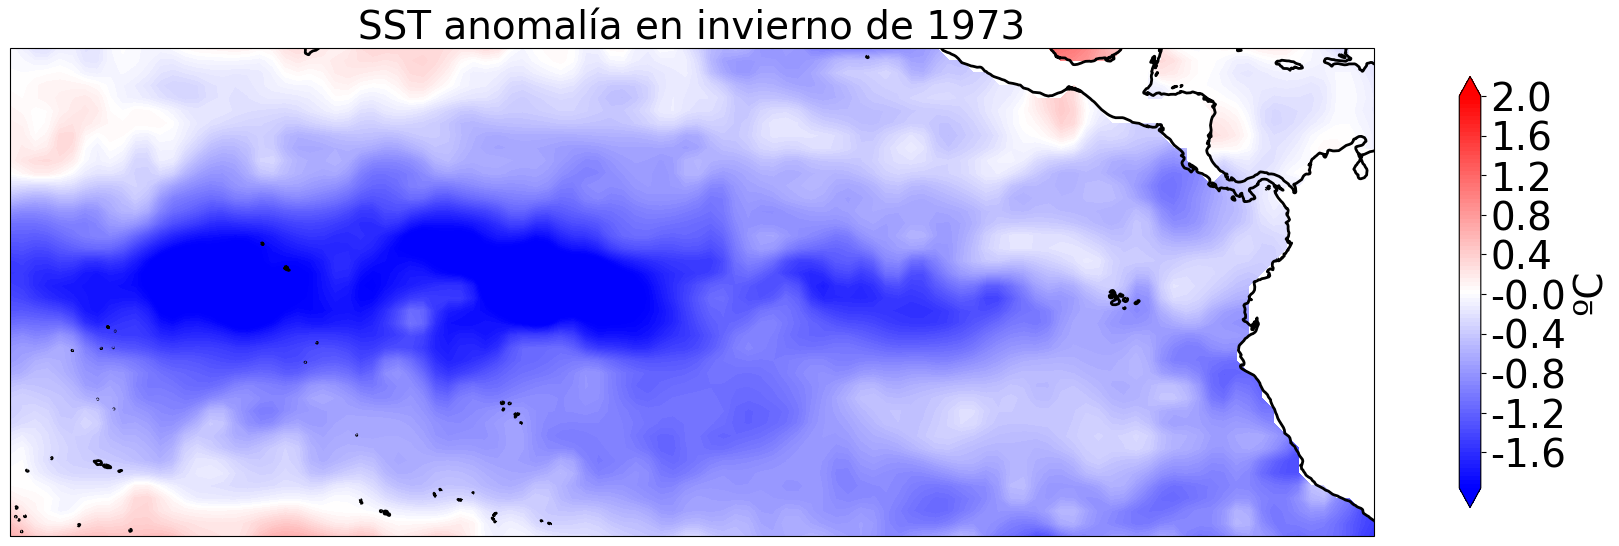

In [197]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an[:,np.where(yrsst==1973)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST anomalía en invierno de 1973',ax)

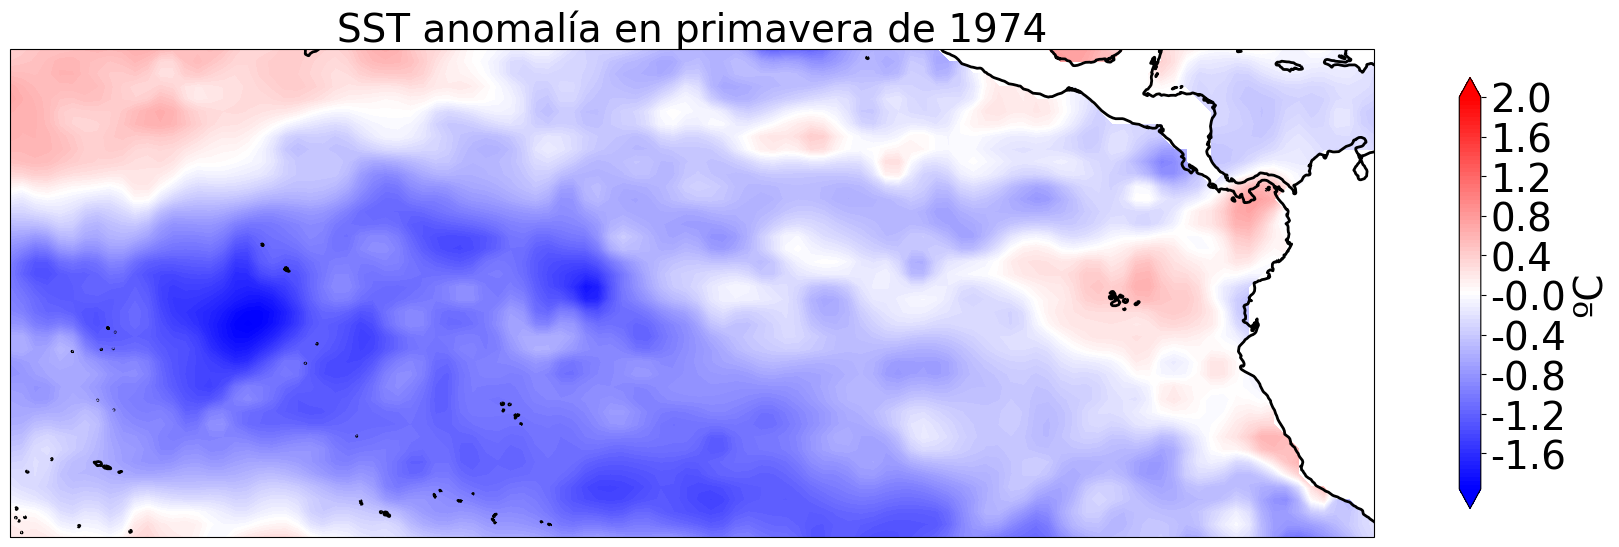

In [198]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an2[:,np.where(yrsst==1974)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST anomalía en primavera de 1974',ax)

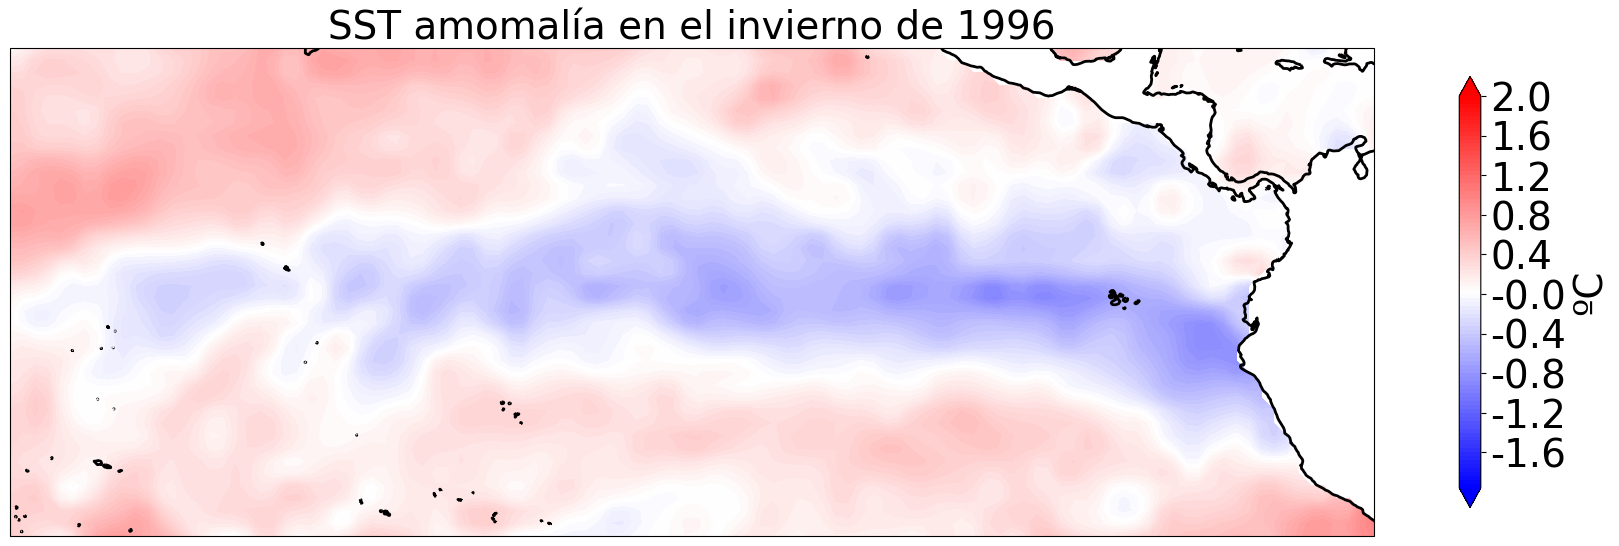

In [199]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an[:,np.where(yrsst==1996)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST amomalía en el invierno de 1996',ax)

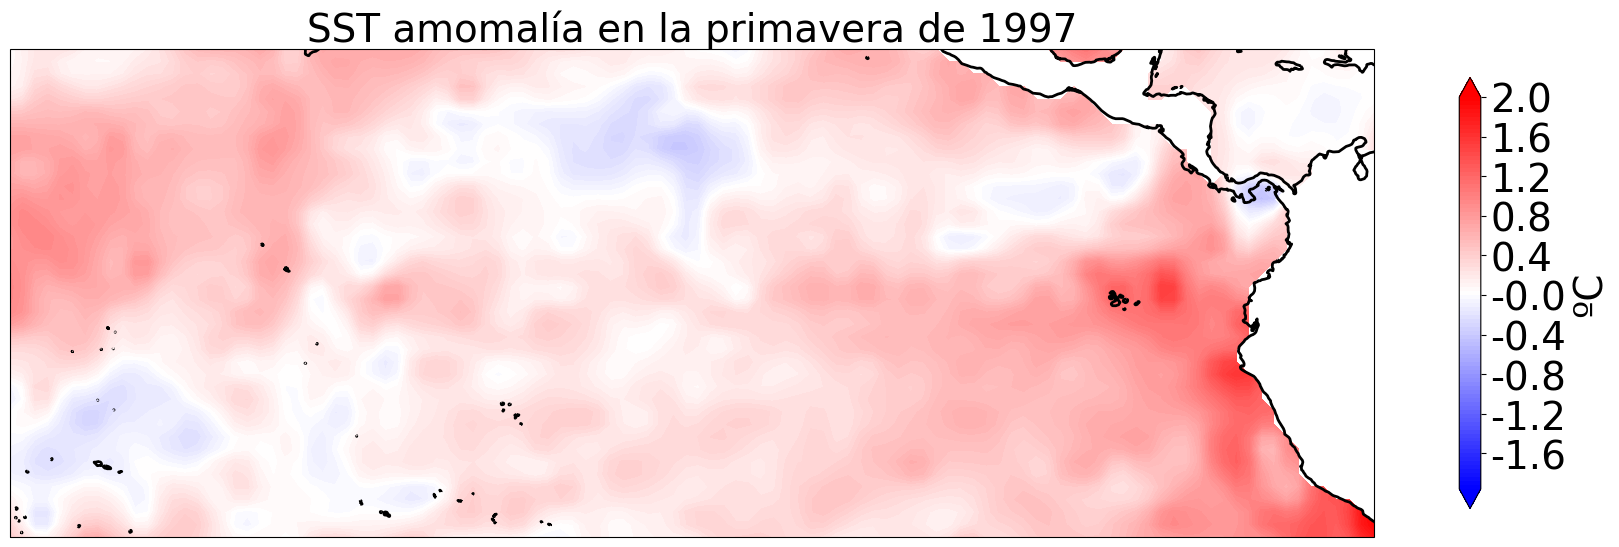

In [200]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an2[:,np.where(yrsst==1997)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST amomalía en la primavera de 1997',ax)

# Reconstruir un campo

Los años 1974, por tratarse de un año frío y el año 1997 al registrar una de las primaveras más calurosas de los últimos años.

In [256]:
lon=tn10_remallado.lon
lat=tn10_remallado.lat

In [257]:
PC1s.shape

(114, 4)

In [258]:
yrss=np.linspace(1901,2014,114)


con esta parte selecciono directamente el año


In [259]:
PC1s[yrss==1974,0]

array([-1.71775447])

In [260]:
Yreconst1=reg1_final*PC1s[yrss==1974,0]

Text(0.5, 1.0, 'Reconstrucción del índice con PC1, año 1974')

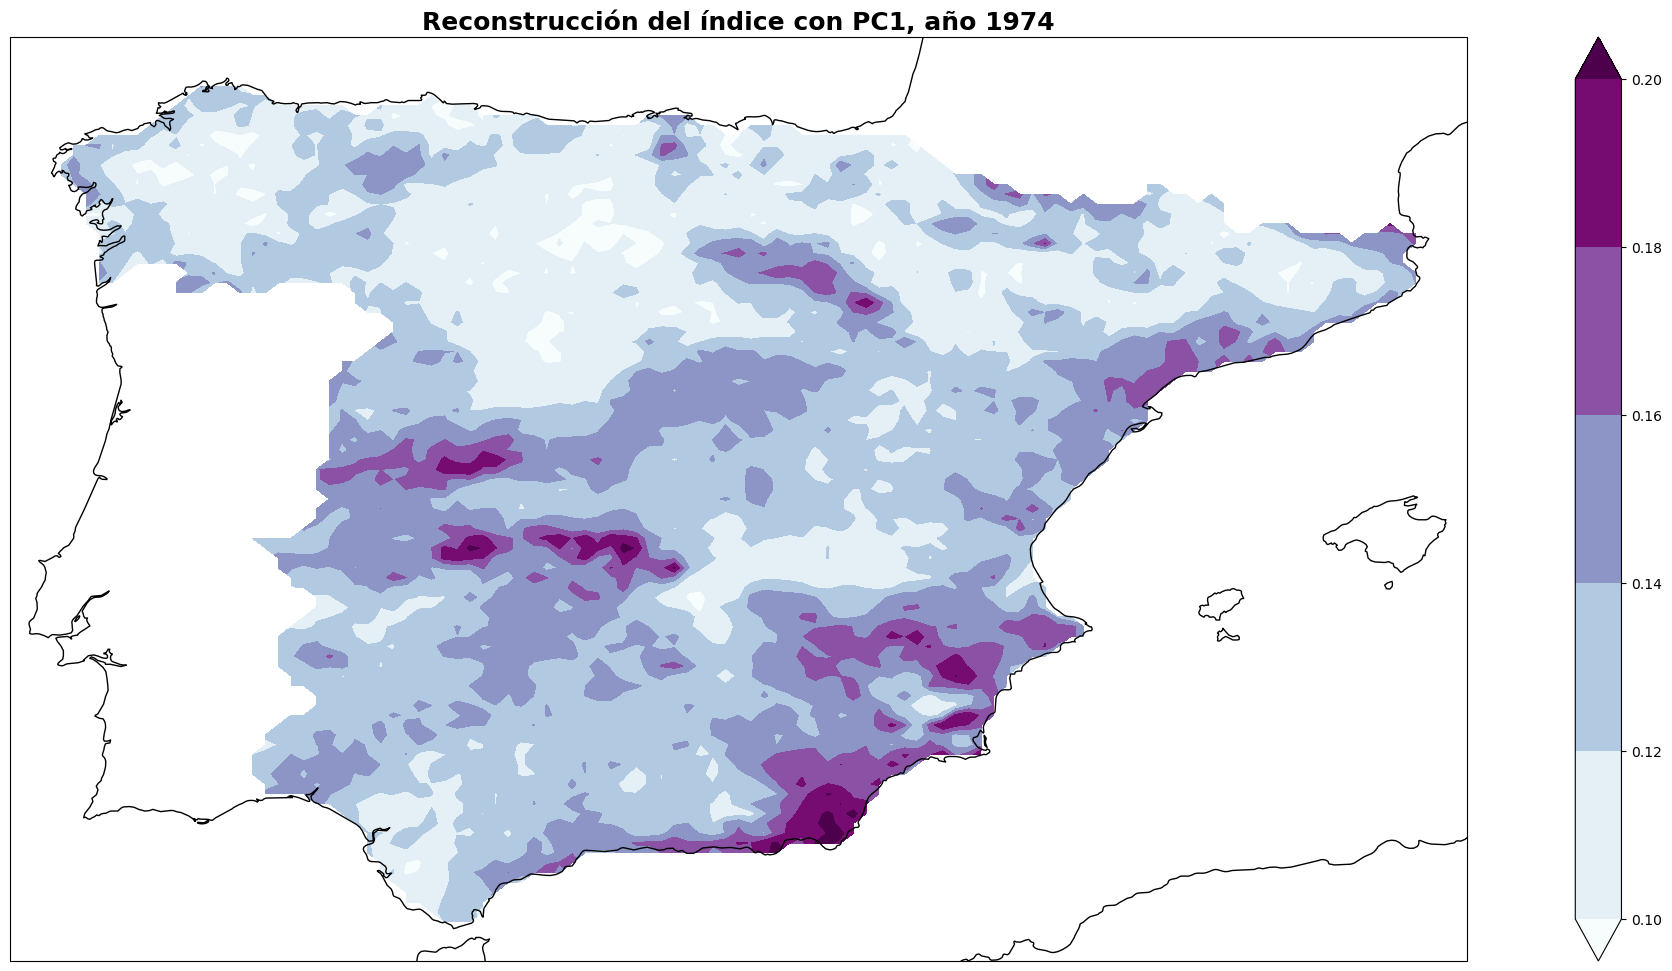

In [270]:
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1, año 1974',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1, año 1997')

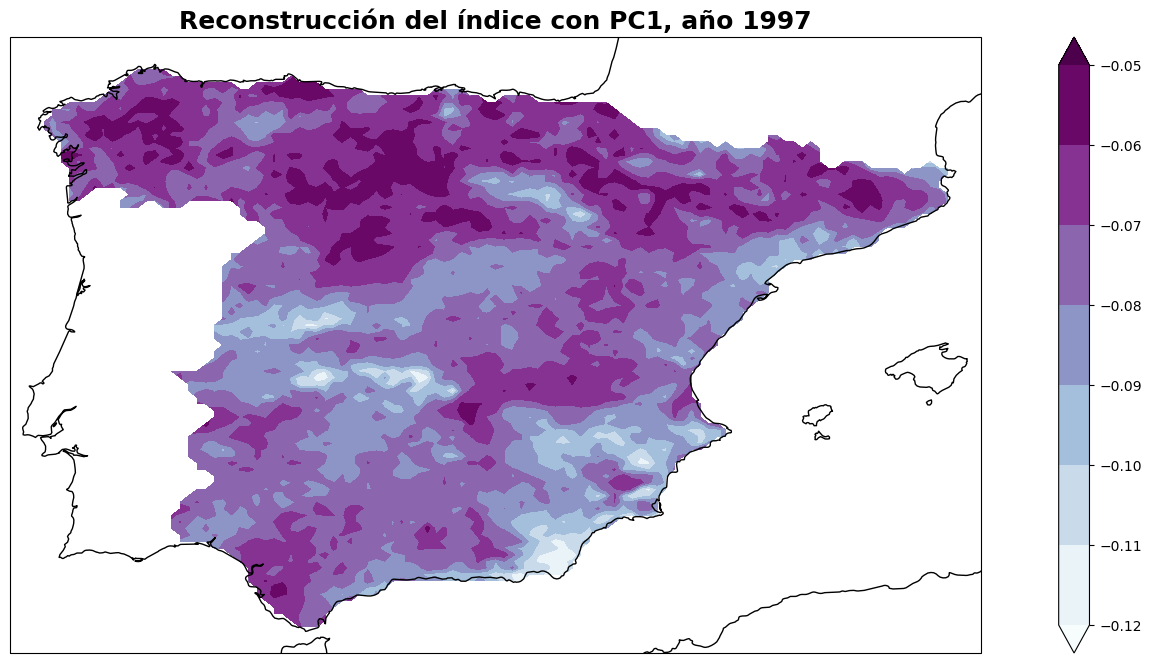

In [335]:
PC1s[yrss==1997,0]
Yreconst1_=reg1_final*(PC1s[yrss==1997,0]/2)
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1_.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1, año 1997',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1+PC2+PC3, año 1997')

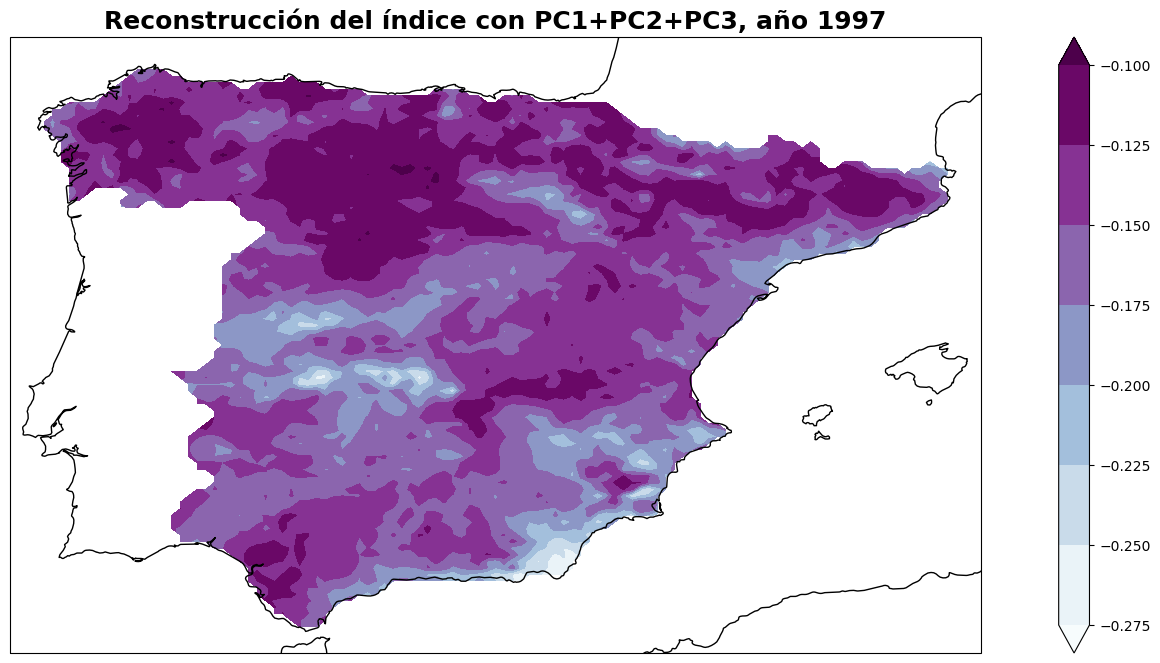

In [276]:
PC1s[yrss==1997,0]
Yreconst1_=reg1_final*PC1s[yrss==1997,0]+reg2_final*PC1s[yrss==1997,1]+reg3_final*PC1s[yrss==1997,2]
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1_.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1+PC2+PC3, año 1997',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1+PC2+PC3 (divididas entre 3), año 1984')

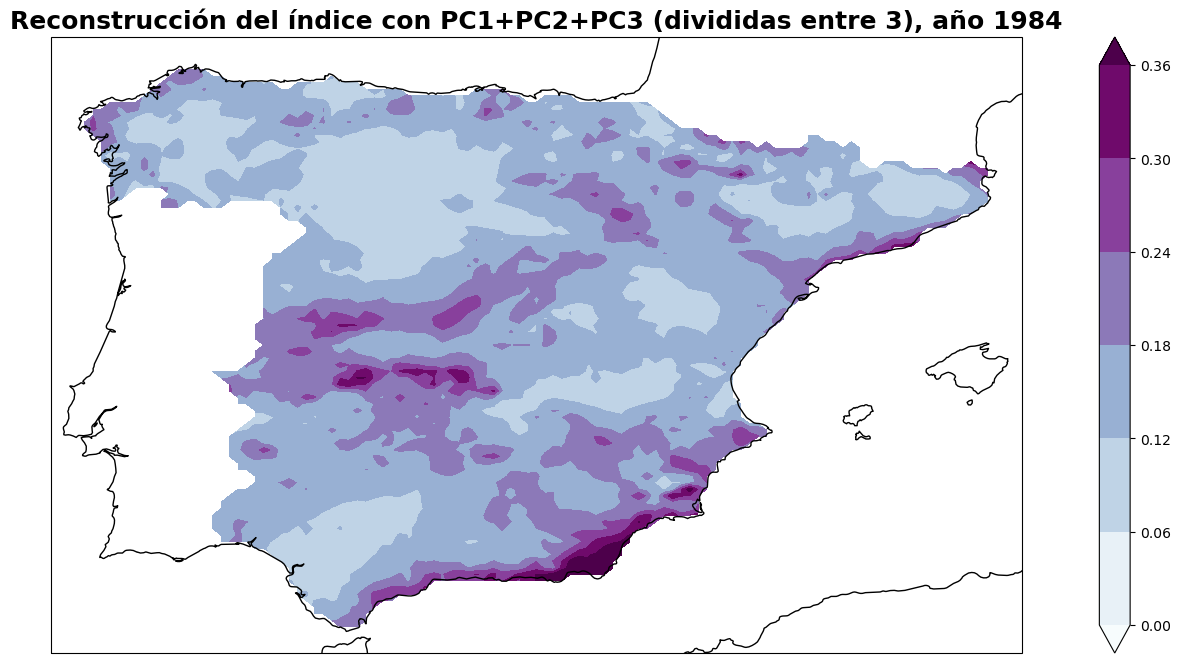

In [341]:
rr= PC1s[yrss==1984,0]/3
levels=np.linspace(0,0.36,7)
Yreconst_1983=reg1_final*(rr)+reg2_final*(rr)+reg3_final*(rr)
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst_1983.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree(), levels=levels)
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1+PC2+PC3 (divididas entre 3), año 1984',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1 (dividida entre 3), año 1984')

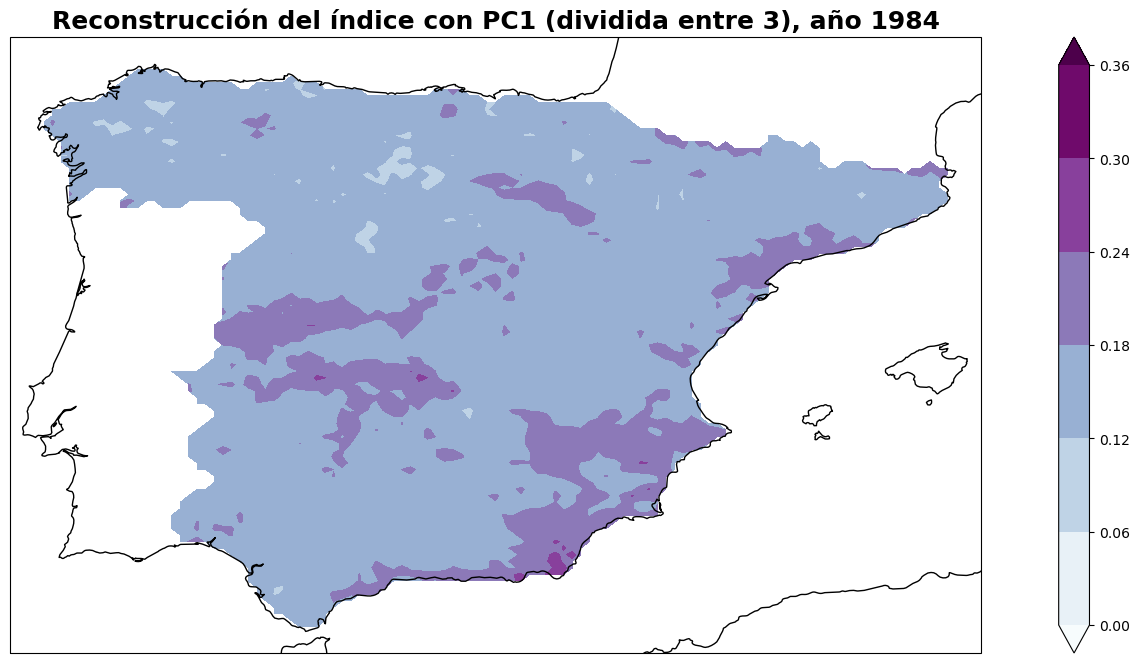

In [343]:
rr= PC1s[yrss==1984,0]/3
levels=np.linspace(0,0.36,7)
Yreconst_1983=reg1_final*(rr)
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst_1983.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree(), levels=levels)
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1 (dividida entre 3), año 1984',fontsize=18,weight='bold')

esto es lo mismo pero en vez de seleccionar el año busco el pico para el que la pc es -6

In [302]:
pico_P1=np.where(PC1s[:,0]<-6)[0][0]

In [303]:
Y=tn10_primavera_anomalia[pico_P1]
pico_P1
Y.shape

(95, 115)

In [304]:
PC1s[pico_P1,0]

-6.245565798551498

In [305]:
reg1_final.shape

(95, 115)

In [306]:
Yreconst2=reg1_final*PC1s[pico_P1,0]
Yreconst2.shape

(95, 115)

In [307]:
Yreconst2_resh=np.reshape(Yreconst2,(len(lat),len(lon)))

Text(0.5, 1.0, 'tn10 primavera reconstruida con PC1')

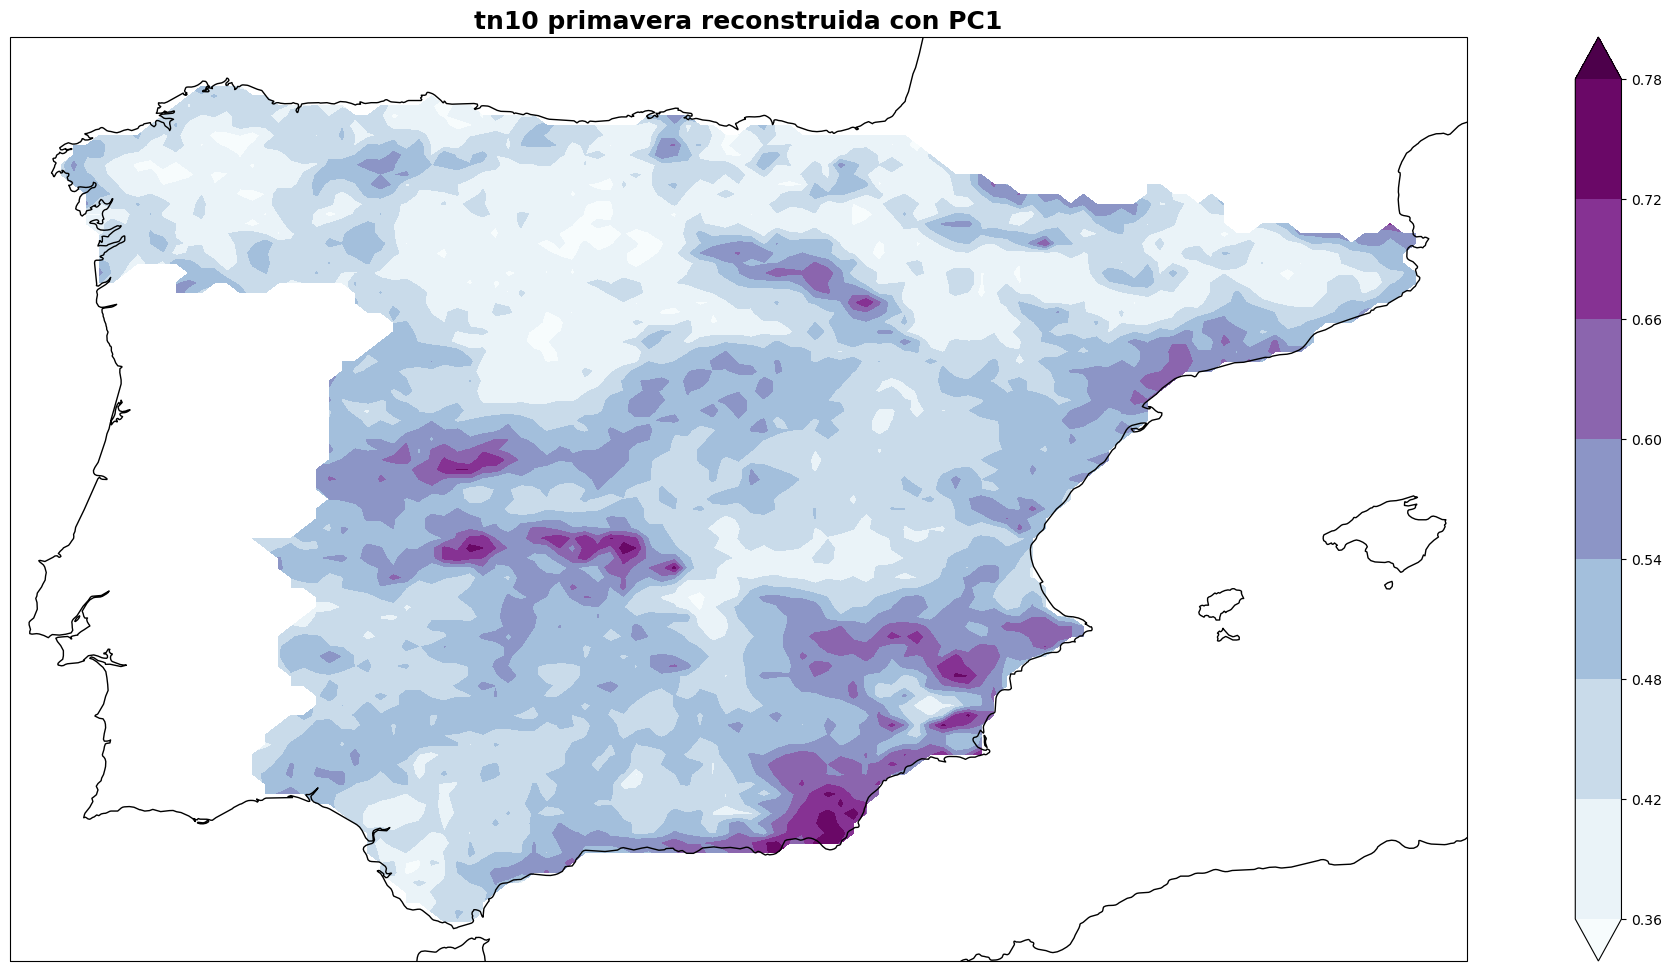

In [308]:
#recontruimos con 1 modo

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))

im = ax.contourf(lon,lat,Yreconst2_resh/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('tn10 primavera reconstruida con PC1',fontsize=18,weight='bold')

Text(0.5, 1.0, 'tn10 primavera reconstruida con PC1+PC2+PC3')

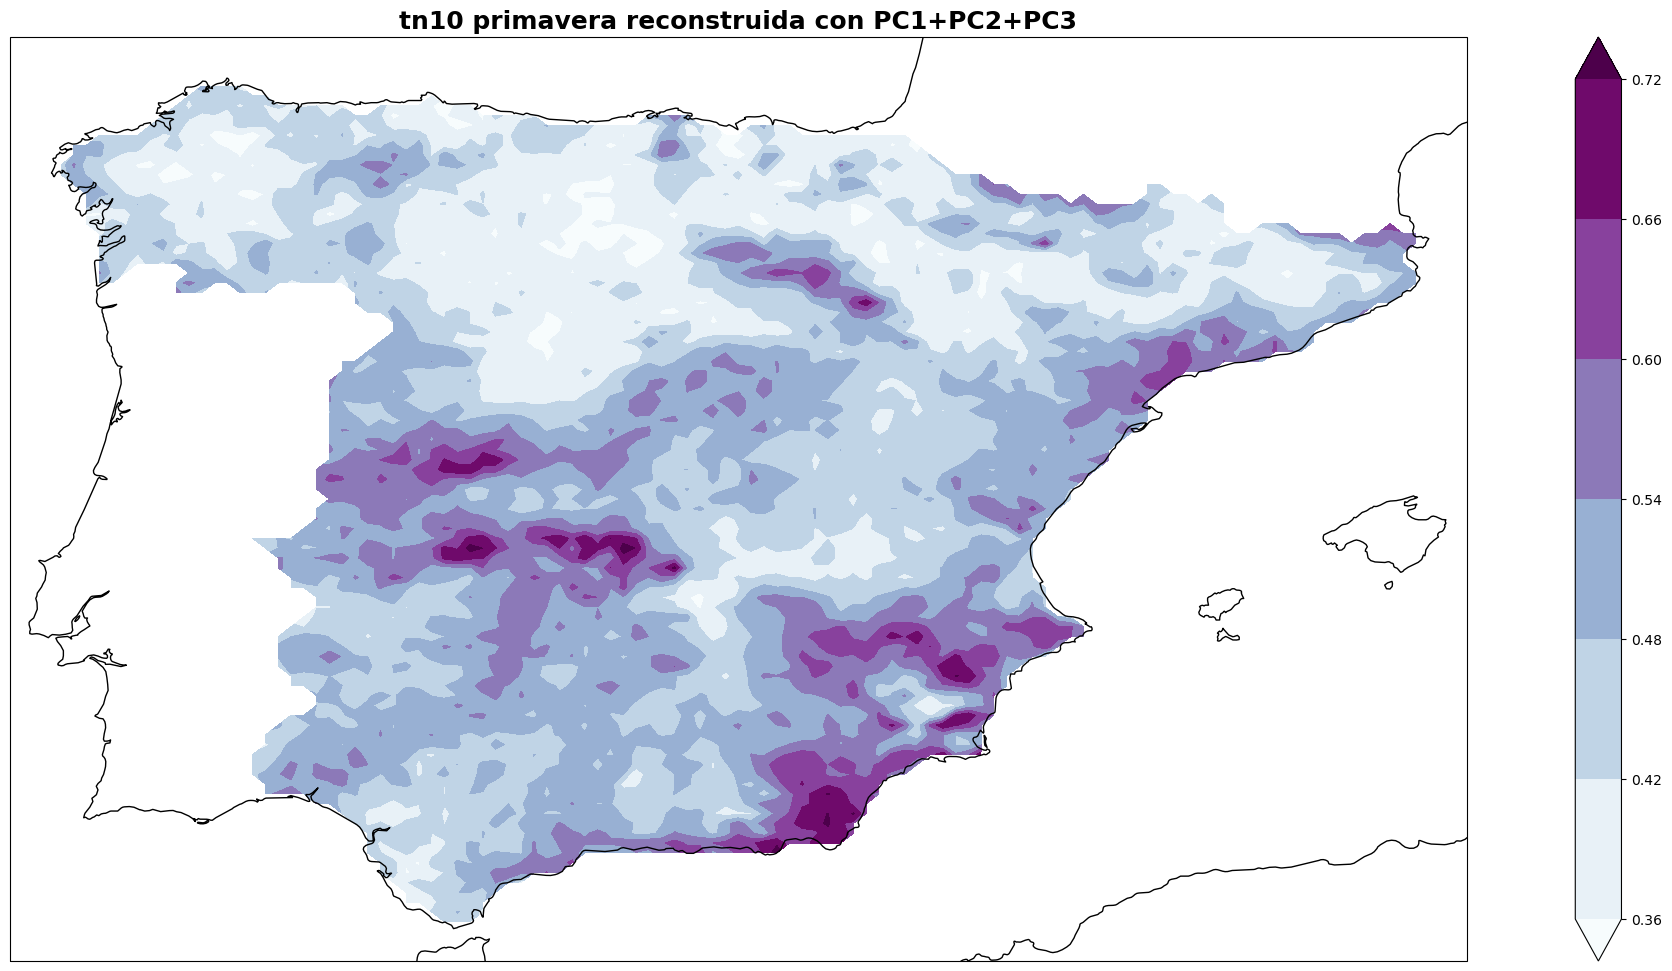

In [309]:
#recontruimos con 3 modos
Yreconst3=reg1_final*PC1s[pico_P1,0]+reg2_final*PC1s[pico_P1,1]+reg3_final*PC1s[pico_P1,2]
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))

im = ax.contourf(lon,lat,Yreconst3.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('tn10 primavera reconstruida con PC1+PC2+PC3',fontsize=18,weight='bold')

In [ ]:
PC1s[yrss==1997,0]
Yreconst1_=reg1_final*PC1s[yrss==1997,0]
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1_.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1, año 1997',fontsize=18,weight='bold')